# Import Packages

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import data_clean_utils
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px

# Load the Data

In [72]:
# load the data

df = pd.read_csv(r'C:\Users\karal\OneDrive\Desktop\swiggy-delivery-time-prediction\swiggy dataset\swiggy.csv')

df.sample(30)

ID  Delivery_person_ID Delivery_person_Age  \
39550  0x9510       MYSRES20DEL01                   34   
22493  0xba2a    RANCHIRES01DEL03                   23   
29636  0xde74       GOARES12DEL02                   20   
7712   0xc2f7      LUDHRES12DEL02                   23   
18912  0x2395       SURRES11DEL02                   27   
5163   0x6244     COIMBRES05DEL03                   22   
13765  0xa07a      INDORES18DEL01                   20   
14111  0x421d       JAPRES18DEL02                   37   
27129  0x80be     BANGRES010DEL03                   34   
1389   0x6aae       JAPRES02DEL02                   35   
23007  0x3f43       MUMRES03DEL03                   26   
12547  0x98f4      CHENRES19DEL01                   31   
34565  0x61ff       SURRES03DEL02                   21   
21189  0x4d6e      INDORES12DEL02                   28   
40104  0xa07d       MYSRES07DEL02                   23   
5891   0x118a       VADRES13DEL02                   34   
27331  0x2c7f       HYDRES09DEL01                   37   
15105  0x846f       JAPRES12DEL03                   39   
26341  0x14b3       HYDRES20DEL01                   33   
12439  0x2f52      BANGRES18DEL01                   35   
30833  0x8362      PUNERES12DEL02                   34   
7800   0x5e5f       MUMRES19DEL01                   37   
14784  0xb91a      BANGRES04DEL02                   39   
25398  0xe0cd       KOCRES08DEL01                   37   
38393  0x59b9   RANCHIRES010DEL01                   25   
37769  0x3054      BANGRES08DEL02                   39   
43752  0x13b1       JAPRES04DEL02                   23   
42766  0x2b63    RANCHIRES12DEL01                   38   
8490   0x628f       MYSRES06DEL02                   26   
15249  0x3056     CHENRES010DEL01                   35   

      Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
39550                     4.3            12.337978             76.616792   
22493                     4.6            23.416792             85.316842   
29636                     4.8            15.516833             73.768172   
7712                      4.6            30.893244             75.821817   
18912                     4.9            21.157735             72.768778   
5163                      4.1            11.022169             76.999594   
13765                     4.9            22.753839             75.897429   
14111                     4.2            26.913987             75.752891   
27129                     4.7            12.933298             77.614293   
1389                      4.7            26.914142             75.805704   
23007                     4.3            19.223840             72.841347   
12547                     4.7            12.986047             80.218114   
34565                     4.7            21.186884             72.793616   
21189                       5            22.748060             75.893400   
40104                     4.9            12.325461             76.632278   
5891                      4.6            22.310237             73.158921   
27331                     4.8            17.431668             78.408321   
15105                     4.6            26.902908             75.792934   
26341                       4            17.483216             78.552111   
12439                     4.3            12.913041             77.683237   
30833                     4.6            18.520016             73.830547   
7800                      4.8            19.131141             72.813074   
14784                     4.1            12.980410             77.640489   
25398                     4.2             9.985497             76.276999   
38393                     4.6            23.354422             85.332900   
37769                     3.9            12.906229             77.596791   
43752                     4.9            26.902328             75.794257   
42766                     4.8             0.000000              0.000000   
8490     

# Data Cleaning

In [73]:
# clean the data using the utils file

data_clean_utils.perform_data_cleaning(data=df)

In [74]:
# load the cleaned data

df_final = pd.read_csv('swiggy_cleaned.csv')

In [75]:
df_final

rider_id   age  ratings  restaurant_latitude  \
0        INDORES13DEL02   37.0      4.9            22.745049   
1        BANGRES18DEL02   34.0      4.5            12.913041   
2        BANGRES19DEL01   23.0      4.4            12.914264   
3       COIMBRES13DEL02   38.0      4.7            11.003669   
4        CHENRES12DEL01   32.0      4.6            12.972793   
...                  ...   ...      ...                  ...   
45497     JAPRES04DEL01   30.0      4.8            26.902328   
45498     AGRRES16DEL01   21.0      4.6                  NaN   
45499    CHENRES08DEL03   30.0      4.9            13.022394   
45500   COIMBRES11DEL01   20.0      4.7            11.001753   
45501  RANCHIRES09DEL02   23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 75.892471          22.765049           75.912471   
1                 77.683237          13.043041           77.813237   
2                 77.678400          12.924264           77.688400   
3                 76.976494          11.053669           77.026494   
4                 80.249982          13.012793           80.289982   
...                     ...                ...                 ...   
45497             75.794257          26.912328           75.804257   
45498                   NaN                NaN                 NaN   
45499             80.242439          13.052394           80.272439   
45500             76.986241          11.041753           77.026241   
45501             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  city_name order_day order_month  \
0      2022-03-19       sunny    high  ...       INDO        19           3   
1      2022-03-25      stormy     jam  ...       BANG        25           3   
2      2022-03-19  sandstorms     low  ...       BANG        19           3   
3      2022-04-05       sunny  medium  ...      COIMB         5           4   
4      2022-03-26      cloudy    high  ...       CHEN        26           3   
...           ...         ...     ...  ...        ...       ...         ...   
45497  2022-03-24       windy    high  ...        JAP        24           3   
45498  2022-02-16       windy     jam  ...        AGR        16           2   
45499  2022-03-11      cloudy     low  ...       CHEN        11           3   
45500  2022-03-07      cloudy    high  ...      COIMB         7           3   
45501  2022-03-02         fog  medium  ...     RANCHI         2           3   

       order_day_of_week is_weekend pickup_time_minutes  order_time_hour  \
0               saturday          1                15.0             11.0   
1                 friday          0                 5.0             19.0   
2               saturday          1                15.0              8.0   
3                tuesday          0                10.0             18.0   
4               saturday          1                15.0             13.0   
...                  ...        ...                 ...              ...   
45497           thursday          0                10.0             11.0   
45498          wednesday          0                15.0             19.0   
45499             friday          0                15.0             23.0   
45500             monday          0                 5.0             13.0   
45501          wednesday          0                 5.0             17.0   

      order_time_of_day   distance  distance_type  
0               morning   3.025149          short  
1               evening  20.183530      very_long  
2               morning   1.552758          short  
3               evening   7.790401         medium  
4             afternoon   6.210138         medium  
...                 ...        ...            ...  
45497           morning   1.489846          short  
45498           evening        NaN            NaN  
45499             night   4.657195          short  
45500         afternoon 

# Preliminary Analysis

In [76]:
# check for missing values in the data

df_final.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day       2070
distance                3630
distance_type           3630
dtype: int64

In [77]:
# number of rows in the data that have missing values

missing_rows = (
    df_final
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} rows with missing values in the data.')

print(f"It accounts for {(missing_rows/df_final.shape[0])*100:.2f}% of the data")

There are 7807 rows with missing values in the data.
It accounts for 17.16% of the data


**The initial percentage of missing data was `9.2%` and increased to `16.35%` because we transformed 0 values in the lat long columns to NaN**

In [78]:
# check for duplicate rows in the data

df_final.duplicated().sum()

np.int64(0)

**There are no duplicate rows in the data and none were created by our data cleaning step**

In [79]:
# data types of features

df_final.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather                  object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken                int64
city_name                object
order_day                 int64
order_month               int64
order_day_of_week        object
is_weekend                int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_of_day        object
distance                float64
distance_type            object
dtype: object

In [80]:
# numerical and categorical columns

num_cols = df_final.columns[[1,2,3,4,5,6,16,22,25]].tolist()
cat_cols = [col for col in df_final.columns.tolist() if col not in num_cols]

print(f'There are {len(num_cols)} numerical columns and {len(cat_cols)} categorical columns in the data.')

There are 9 numerical columns and 18 categorical columns in the data.


In [81]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'pickup_time_minutes',
 'distance']

In [82]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day',
 'distance_type']

In [83]:
# statistical summary of numerical columns

df_final[num_cols].describe()

age       ratings  restaurant_latitude  restaurant_longitude  \
count  43648.000000  43594.000000         41872.000000          41872.000000   
mean      29.555008      4.635287            18.913696             76.921664   
std        5.761482      0.313827             5.467265              3.503107   
min       20.000000      2.500000             9.957144             72.768726   
25%       25.000000      4.500000            12.986047             73.897902   
50%       30.000000      4.700000            19.065838             76.618203   
75%       35.000000      4.900000            22.751234             78.368855   
max       39.000000      5.000000            30.914057             88.433452   

       delivery_latitude  delivery_longitude    time_taken  \
count       41872.000000        41872.000000  45502.000000   
mean           18.977356           76.985325     26.297591   
std             5.469056            3.503260      9.386419   
min             9.967144           72.778726     10.000000   
25%            13.065996           73.940327     19.000000   
50%            19.124049           76.662620     26.000000   
75%            22.820040           78.405467     32.000000   
max            31.054057           88.563452     54.000000   

       pickup_time_minutes      distance  
count         43862.000000  41872.000000  
mean              9.989399      9.719296  
std               4.087516      5.602890  
min               5.000000      1.465067  
25%               5.000000      4.657655  
50%              10.000000      9.193014  
75%              15.000000     13.680920  
max              15.000000     20.969489

In [84]:
# statistical summary of categorical columns

(
    df_final
    .assign(**{
        col: df_final[col].astype("object")
        for col in cat_cols
    })
    .describe(include="object")
    .T
)

count unique              top     freq
rider_id               45502   1320  PUNERES01DEL01        67
order_date             45502     44       2022-03-15     1190
weather                44977      6              fog     7654
traffic                44992      4              low    15477
vehicle_condition      45502      4                2    15034
type_of_order          45502      4            snack    11512
type_of_vehicle        45502      4       motorcycle    26427
multiple_deliveries  44509.0    4.0              1.0  28109.0
festival               45274      2               no    44380
city_type              44304      3    metropolitian    34029
city_name              45502     22              JAP     3439
order_day              45502     30                3     2323
order_month            45502      3                3    31919
order_day_of_week      45502      7        wednesday     7077
is_weekend             45502      2                0    32995
order_time_hour      43862.0   17.0             21.0   4686.0
order_time_of_day      43432      4            night    13773
distance_type          41872      4           medium    11288

## Missing Value Analysis

In [85]:
import missingno as msno

### Matrix Plot


<Axes: >

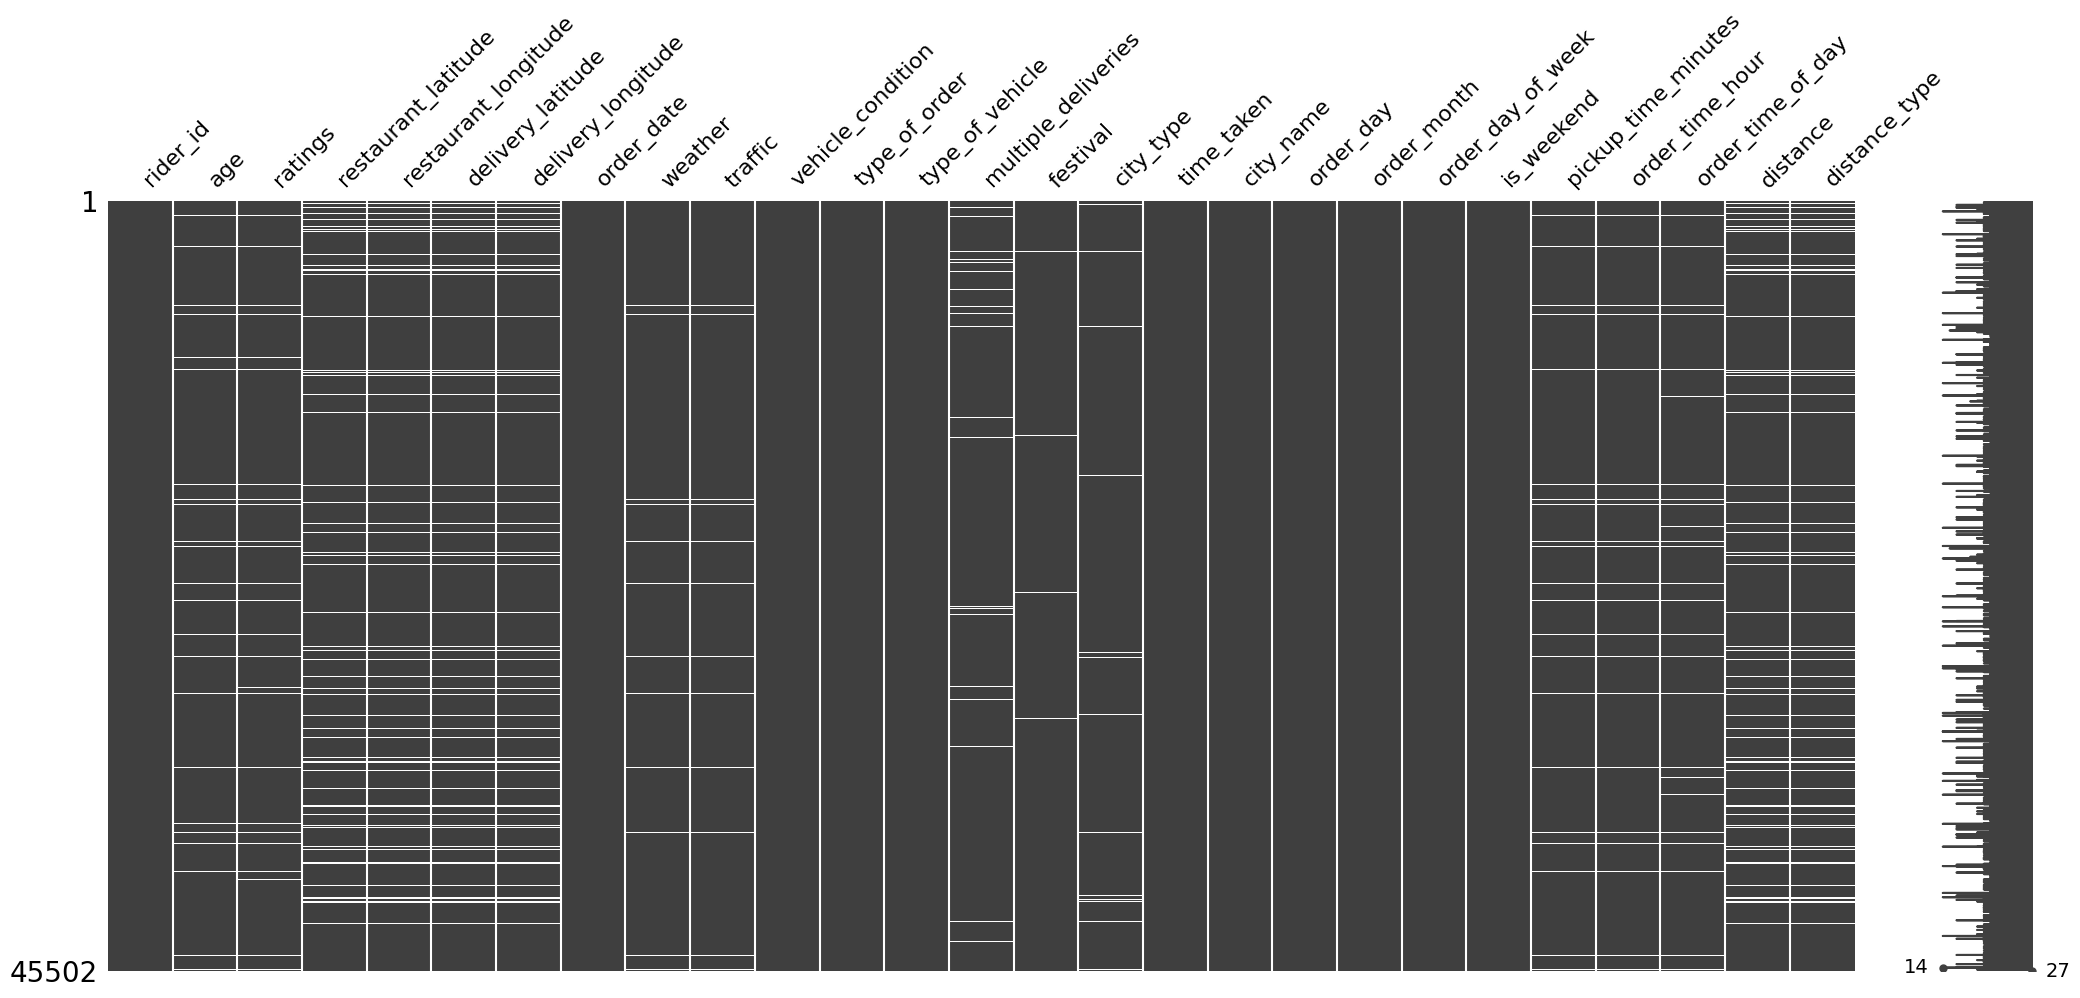

In [86]:
msno.matrix(df_final)

### Corr

<Axes: >

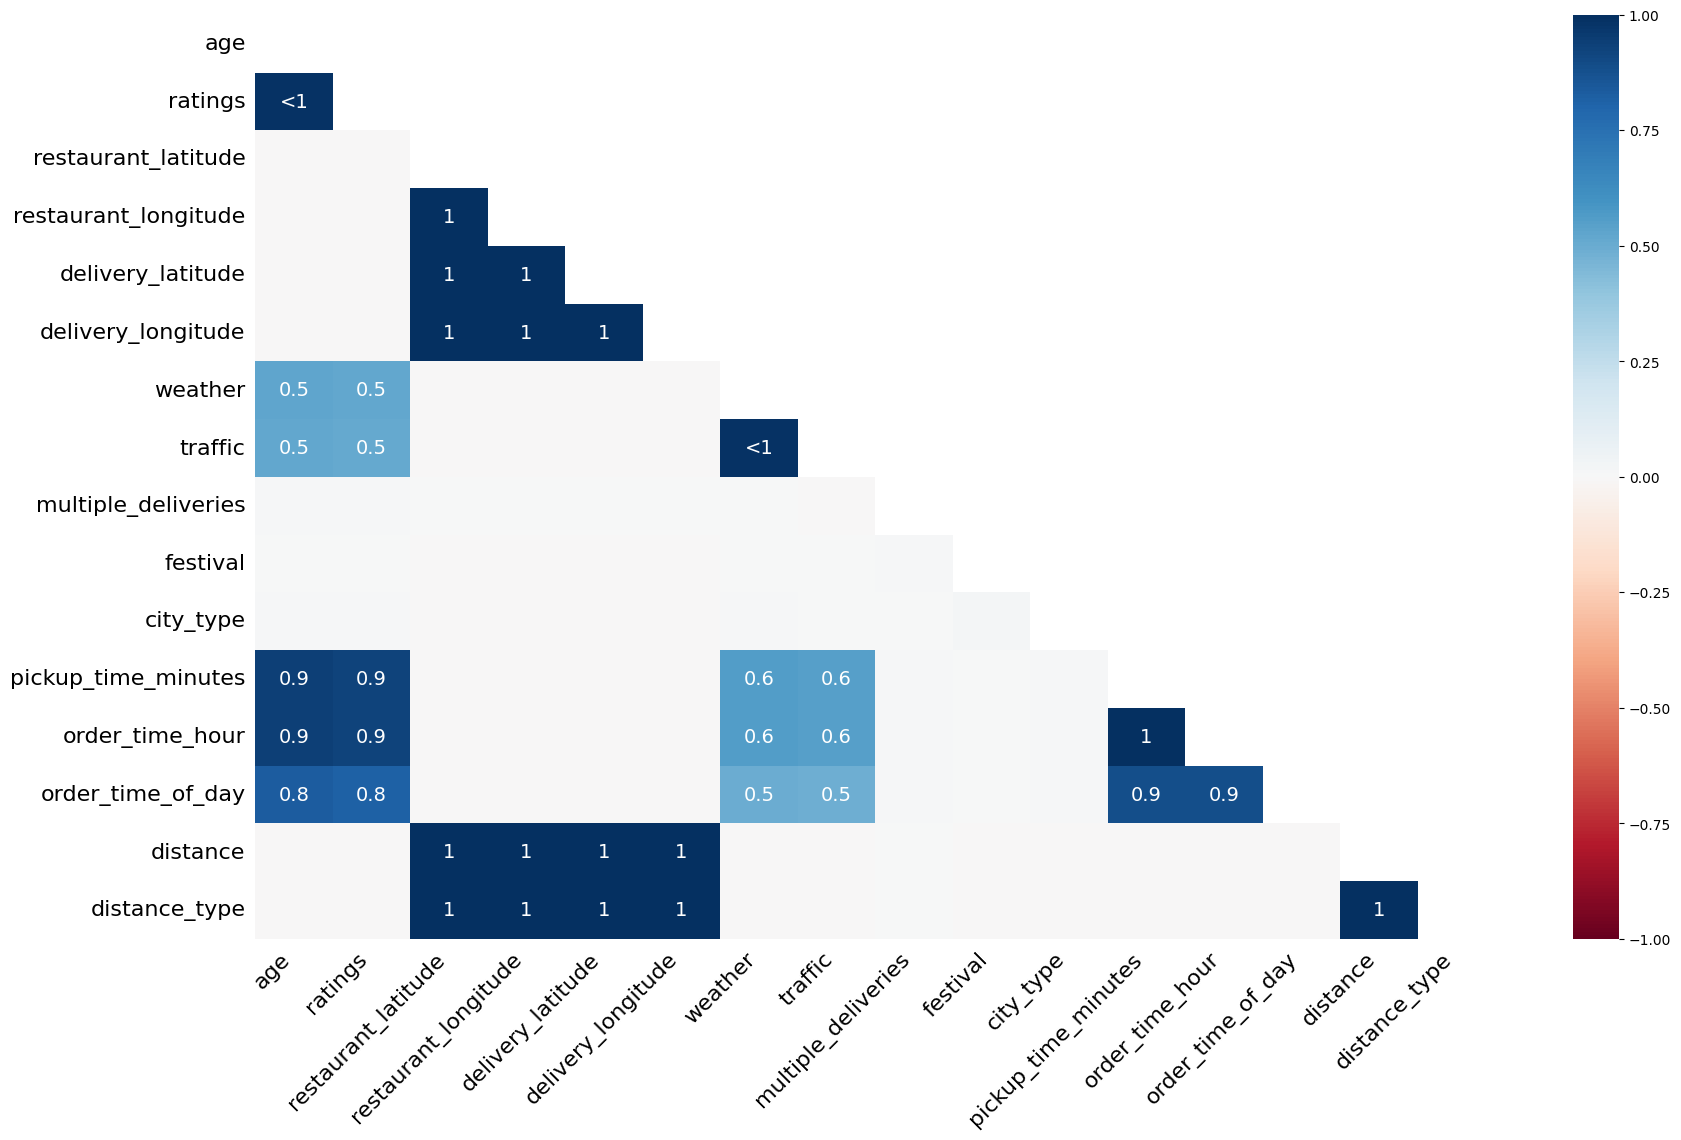

In [87]:
msno.heatmap(df_final)

### Dendrogram

<Axes: >

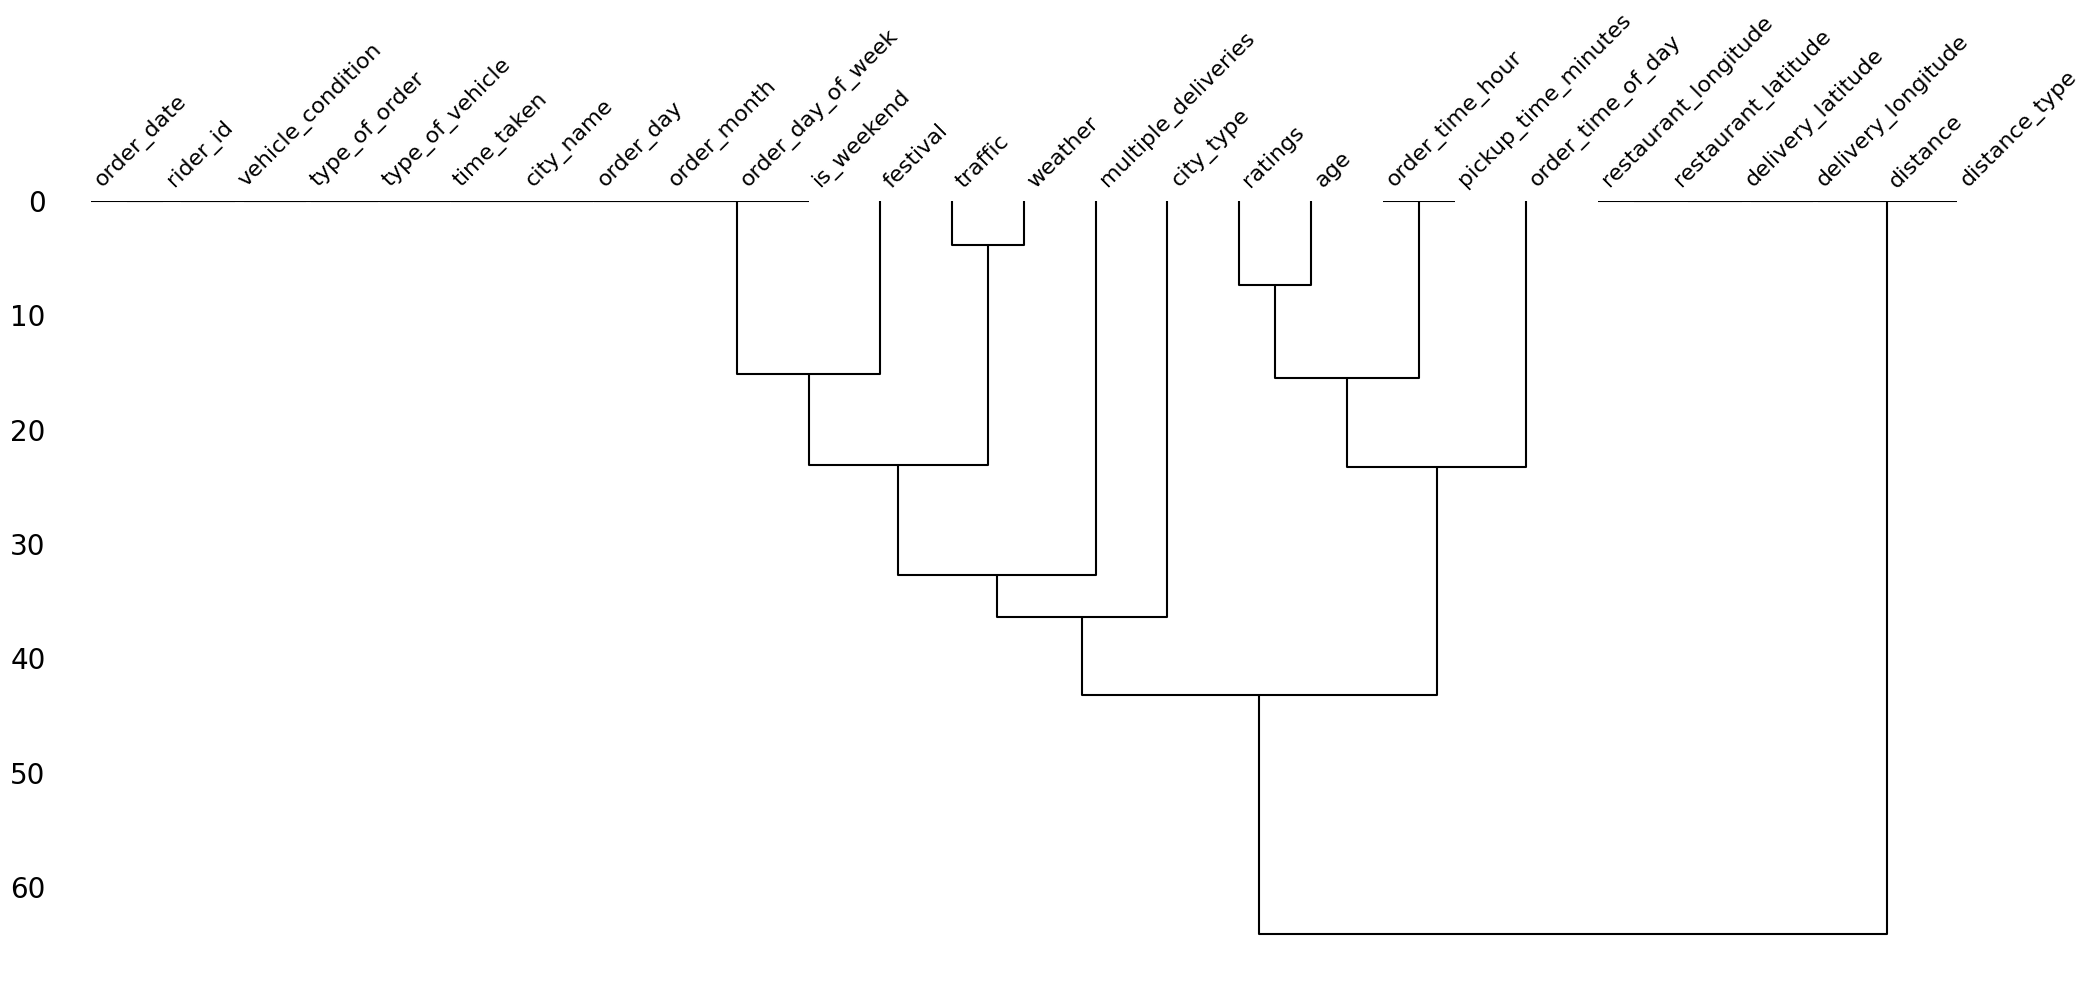

In [88]:
msno.dendrogram(df_final)

# Functions to perform analysis

In [89]:
def numerical_analysis(dataframe, column_name, cat_col=None, bins="auto"):
    # create the figure
    fig = plt.figure(figsize=(15,10))
    # generate the layout
    grid = GridSpec(nrows=2, ncols=2, figure=fig)
    # set subplots
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, :])
    # plot the kdeplot
    sns.kdeplot(data=dataframe, x=column_name,hue=cat_col, ax=ax1)
    # plot the boxplot
    sns.boxplot(data=dataframe, x=column_name,hue=cat_col, ax=ax2)
    # plot the histogram
    sns.histplot(data=dataframe, x=column_name,bins=bins,hue=cat_col,kde=True, ax=ax3)
    plt.tight_layout()
    plt.show()


def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])
    plt.tight_layout()
    plt.show()


def categorical_analysis(dataframe, column_name):
    # print the values counts of categories
    display(
        pd.DataFrame({
            "Count": (
                dataframe[column_name]
                .value_counts()),
            "Percentage": (
                dataframe[column_name]
                .value_counts(normalize=True)
                .mul(100)
                .round(2)
                .astype("str")
                .add("%")
                )
        })
    )
    print("*" * 50)
    # get unique categories
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    # plot countplot
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()


def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    # plot the barplot
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    # plot the boxplot
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    # plot violin plot
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    # plot strip plot
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    data = (
        dataframe.loc[:, [col1, col2]]
        .dropna()
    )
    # create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # perform chi-squared test
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")


# Column Wise Analysis

In [90]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

## Time Taken (Target)

In [91]:
# data type of column

df_final['time_taken'].dtype

dtype('int64')

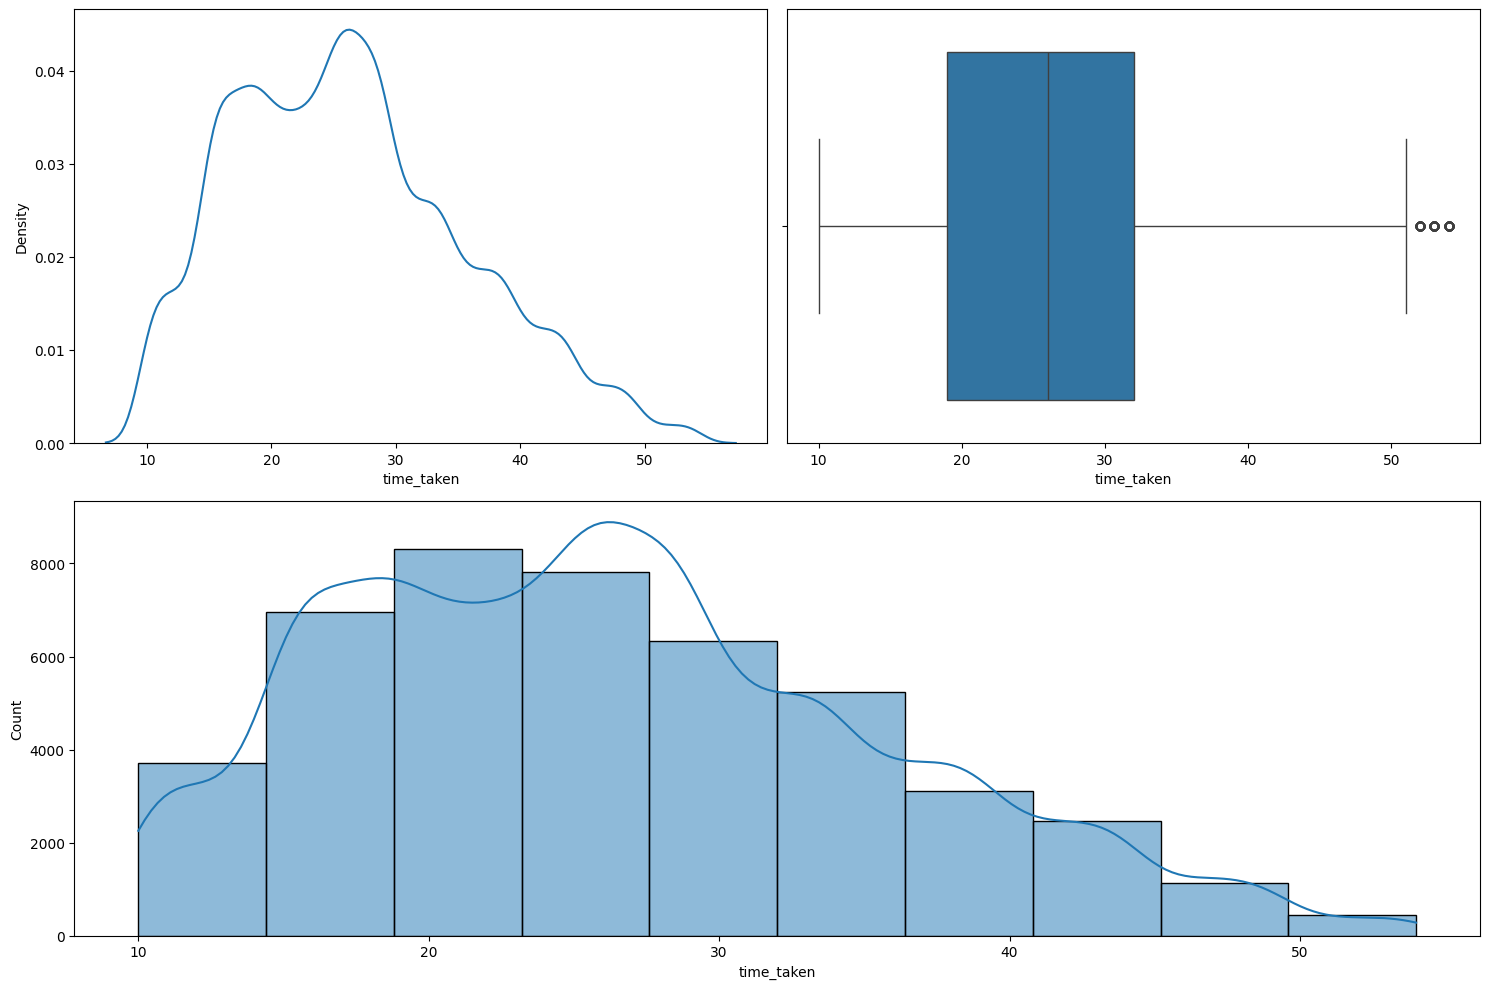

In [92]:
# numerical analysis

numerical_analysis(df_final, 'time_taken',bins=10)

**Observations**:

1. The target column is not fully continuous in nature.
2. The target column shows dual modality with two peaks- One peak around the 17-18 mark and other around 26-27 mark.
4. The target column has some extreme points which can be thought of as outliers but they are just extreme and rare, not outliers. 50 min time is possible for delivery in certain rare cases.

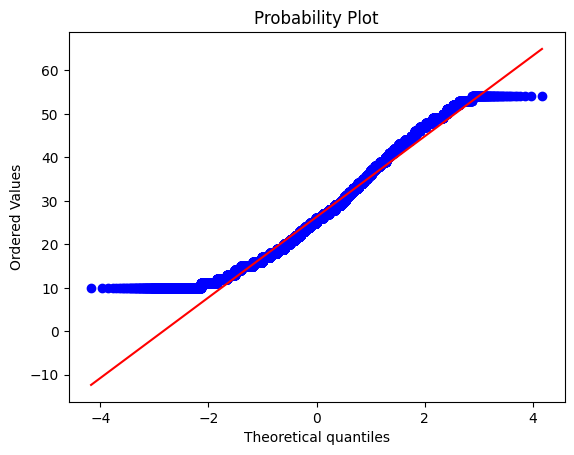

In [93]:
# plot QQ plot for the target

probplot(df_final['time_taken'], plot=plt)
plt.show()

In [94]:
# tests for normailty

test_for_normality(df_final, 'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [95]:
# check out the rows where data is acting as outlier

target_25_per, target_75_per = np.percentile(df_final['time_taken'], [25, 75])
iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5 * iqr)

df_final.loc[(df_final['time_taken'] > upper_bound),"traffic"].value_counts()

traffic
jam     241
high     24
Name: count, dtype: int64

In [96]:
df_final.loc[(df_final['time_taken'] > upper_bound),"weather"].value_counts()

weather
fog           57
sunny         51
windy         44
cloudy        44
stormy        37
sandstorms    32
Name: count, dtype: int64

In [97]:
# average distances
avg_distance = df_final.loc[:,"distance"].mean()
avg_distance_extreme = df_final.loc[(df_final['time_taken'] > upper_bound),"distance"].mean()

print(avg_distance, avg_distance_extreme)

9.71929632319958 13.29215081388658


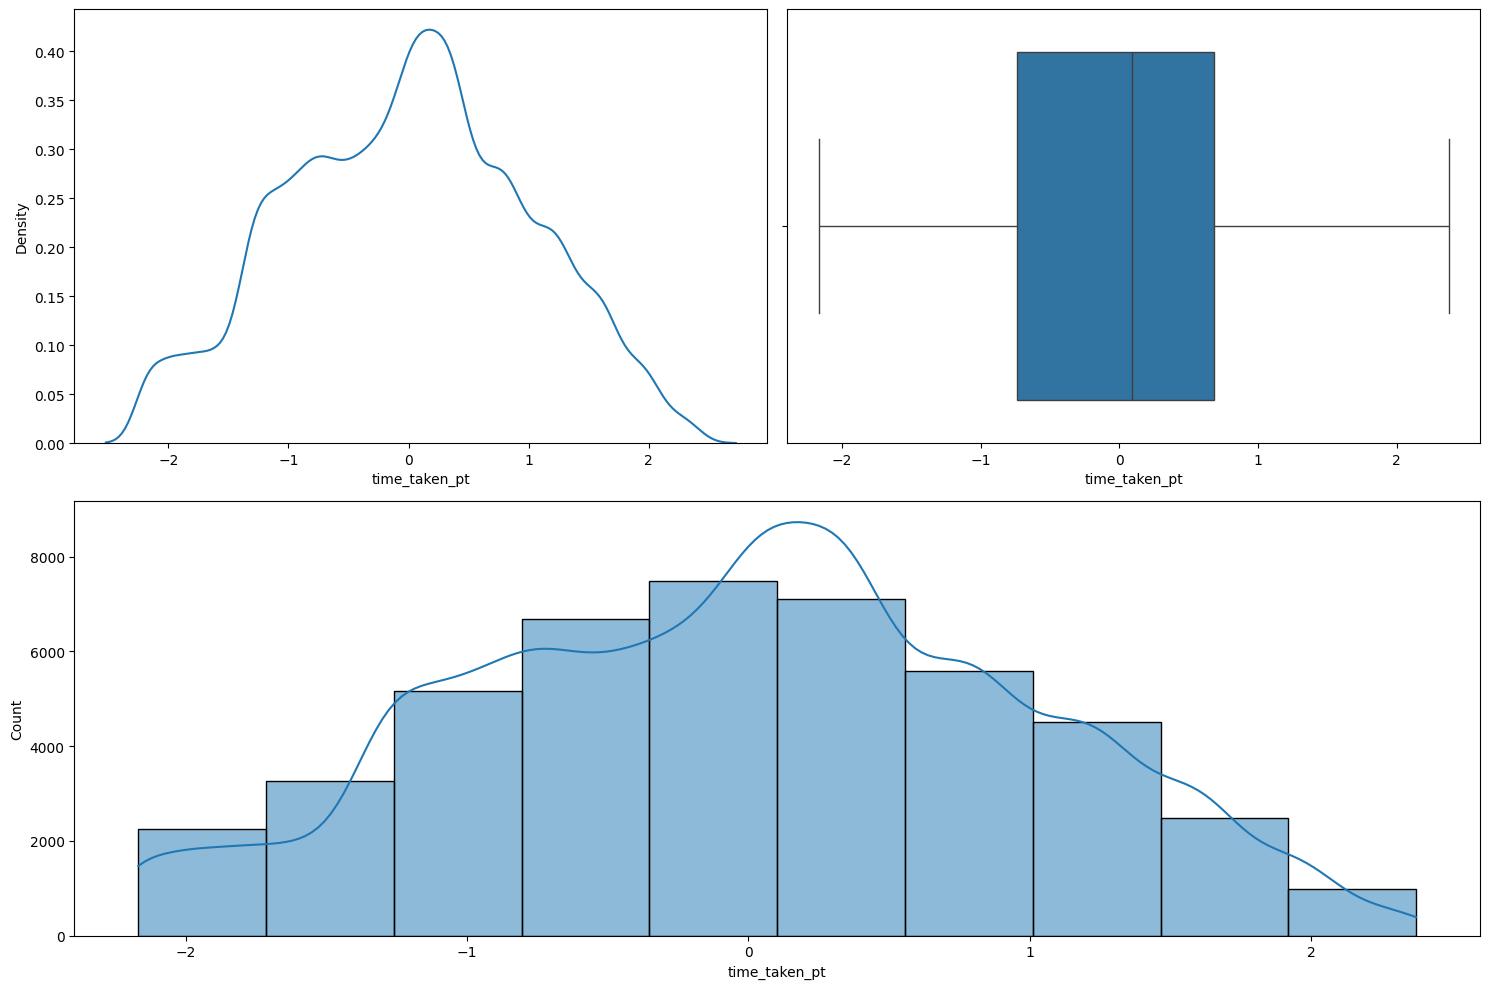

In [98]:
# fix traget column using transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df_final['time_taken_pt'] = pt.fit_transform(df_final[['time_taken']])

numerical_analysis(df_final, "time_taken_pt", bins=10)

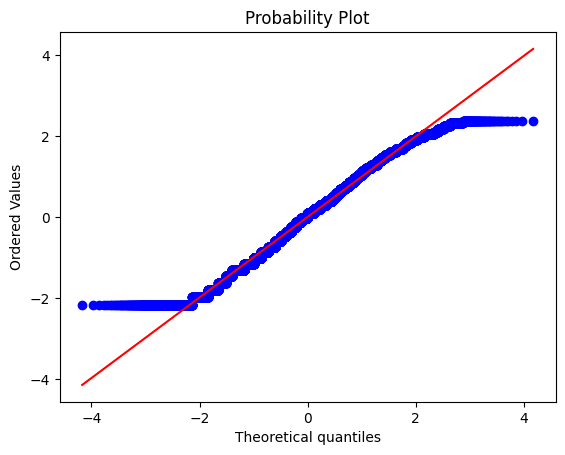

In [99]:
# plot QQ plot for the target after transformation

probplot(df_final['time_taken_pt'], plot=plt)
plt.show()

## Rider_ID

In [100]:
# datatype of rider id

df_final['rider_id'].dtype

dtype('O')

In [101]:
df_final[["rider_id","age","ratings"]]

rider_id   age  ratings
0        INDORES13DEL02   37.0      4.9
1        BANGRES18DEL02   34.0      4.5
2        BANGRES19DEL01   23.0      4.4
3       COIMBRES13DEL02   38.0      4.7
4        CHENRES12DEL01   32.0      4.6
...                  ...   ...      ...
45497     JAPRES04DEL01   30.0      4.8
45498     AGRRES16DEL01   21.0      4.6
45499    CHENRES08DEL03   30.0      4.9
45500   COIMBRES11DEL01   20.0      4.7
45501  RANCHIRES09DEL02   23.0      4.9

[45502 rows x 3 columns]

In [102]:
# sample of data

rider_id_group = df_final[["rider_id","age","ratings"]].groupby('rider_id')
rider_id_group.head(5).sort_values('rider_id')

rider_id   age  ratings
92     AGRRES010DEL01   34.0      4.7
7738   AGRRES010DEL01   21.0      4.7
4554   AGRRES010DEL01   38.0      4.7
12416  AGRRES010DEL01   34.0      4.5
13223  AGRRES010DEL01   39.0      4.4
...                ...   ...      ...
861     VADRES20DEL03   35.0      4.8
9792    VADRES20DEL03   30.0      4.6
9753    VADRES20DEL03   38.0      4.8
5094    VADRES20DEL03   35.0      4.9
5146    VADRES20DEL03   37.0      4.9

[6600 rows x 3 columns]

In [103]:
# check for duplicates

df_final[["rider_id","age","ratings"]].dropna().duplicated(keep=False).sum()

np.int64(10155)

In [104]:
# filter the duplicates

(
    df_final
    .loc[(df_final[["rider_id","age","ratings"]].duplicated(keep=False)),["rider_id","age","ratings"]]
    .dropna()
    .sort_values(["rider_id"])
)

rider_id   age  ratings
18533  AGRRES03DEL02   24.0      4.9
40285  AGRRES03DEL02   24.0      4.9
28473  AGRRES03DEL03   30.0      4.7
26275  AGRRES03DEL03   30.0      4.7
36131  AGRRES06DEL02   36.0      4.9
...               ...   ...      ...
12742  VADRES20DEL02   28.0      4.5
5094   VADRES20DEL03   35.0      4.9
17963  VADRES20DEL03   35.0      4.9
21957  VADRES20DEL03   37.0      4.9
5146   VADRES20DEL03   37.0      4.9

[10155 rows x 3 columns]

**Not Useful for our analysis**

## Age

In [105]:
# data type of age column

df_final['age'].dtype

dtype('float64')

In [106]:
# statistical summary

df_final['age'].describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

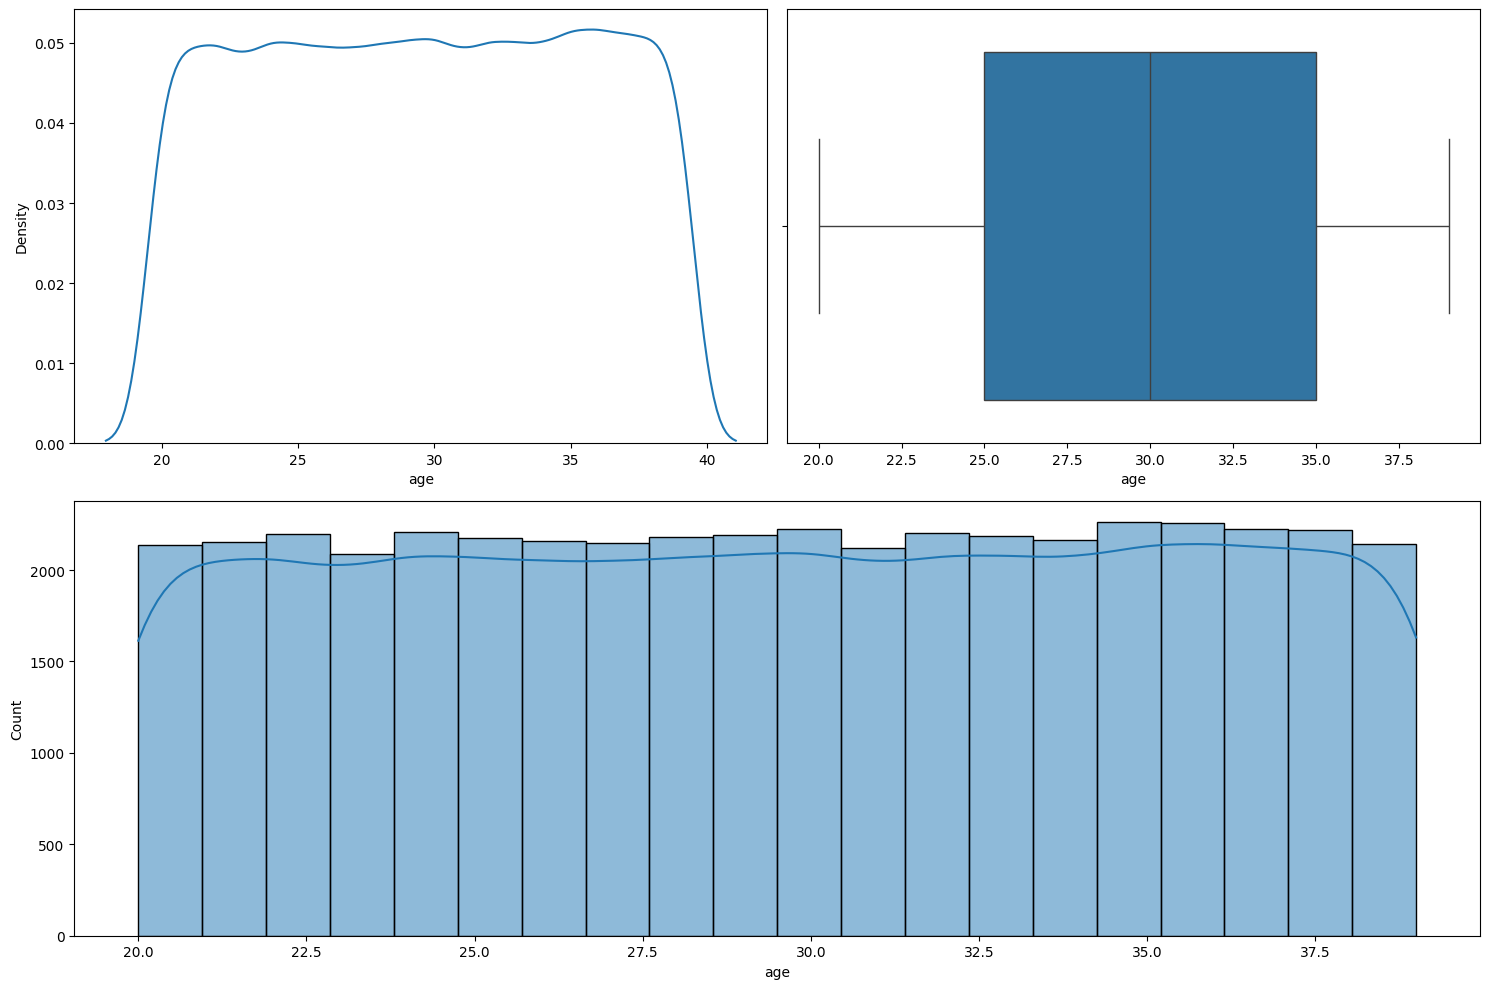

In [107]:
# numerical analysis for age

numerical_analysis(df_final, 'age',bins=20)

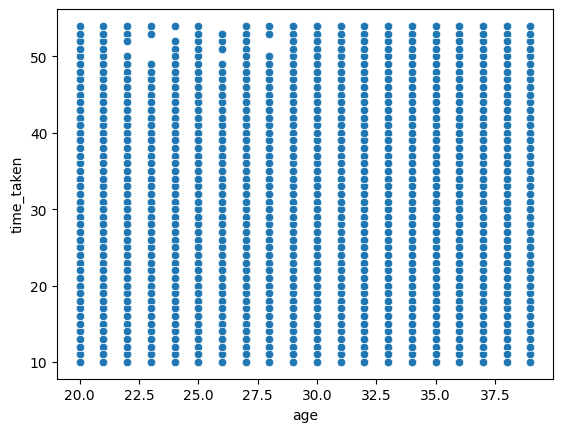

In [108]:
# relationship between target and age

sns.scatterplot(data=df_final, x='age', y='time_taken')
plt.show()

**Age of the rider does not show any impact on timetaken to deliver**

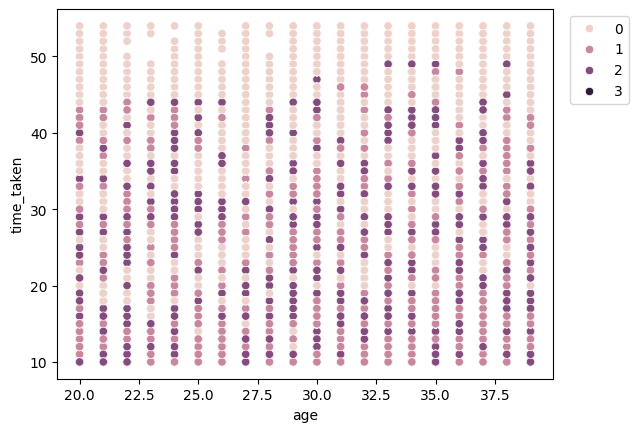

In [109]:
sns.scatterplot(data=df_final, x='age', y='time_taken', hue="vehicle_condition")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

<Axes: xlabel='type_of_vehicle', ylabel='age'>

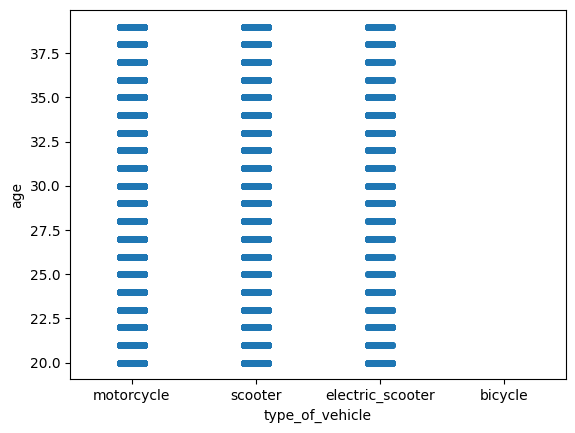

In [110]:
# preferences of vehicle type based on age

sns.stripplot(df_final,x='type_of_vehicle',y='age')

## Ratings

In [111]:
# data type of rating column

df_final['ratings'].dtype

dtype('float64')

In [112]:
# statistical summary

df_final['ratings'].describe()

count    43594.000000
mean         4.635287
std          0.313827
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

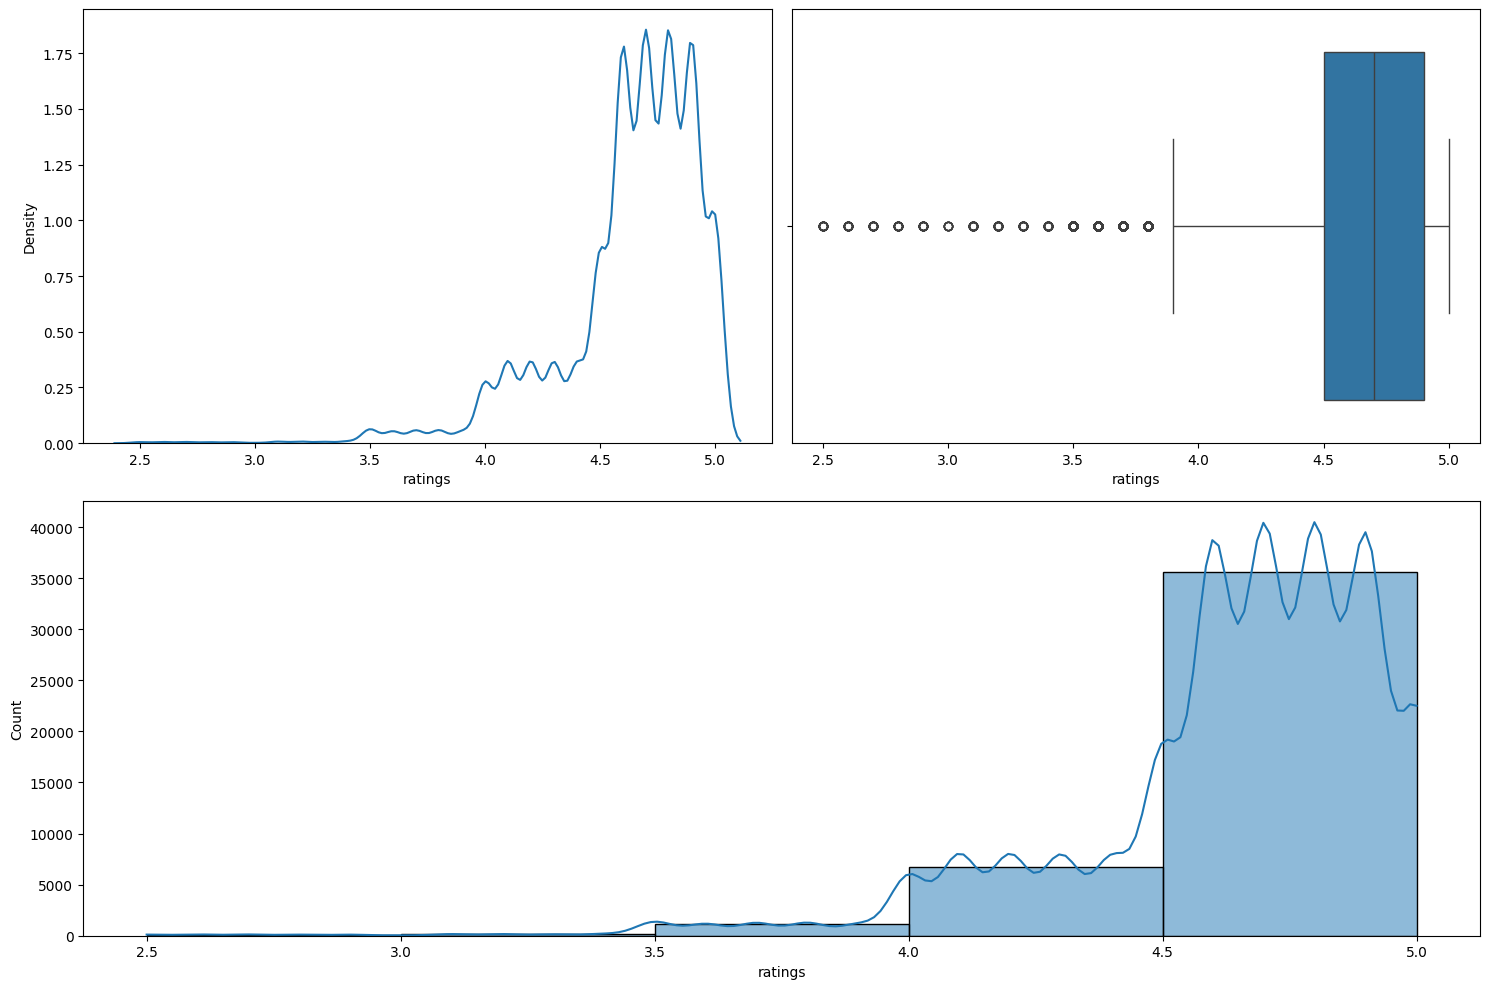

In [113]:
# numerical analysis

numerical_analysis(df_final, 'ratings',bins=5)

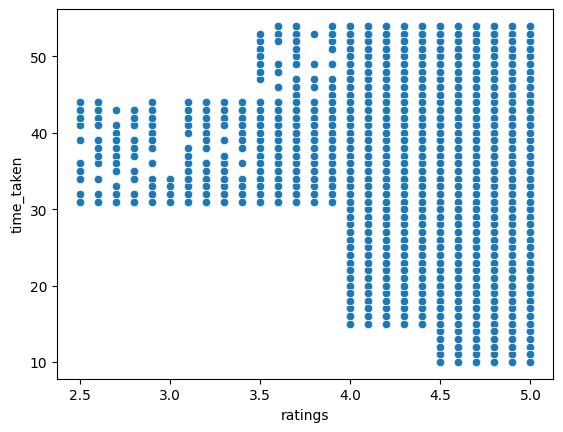

In [114]:
# does ratings affect delivery time

sns.scatterplot(data=df_final, x='ratings', y='time_taken')
plt.show()

**It seems like riders with more ratings get more orders**

**Higher ratings equates to more work and more income opportunities**

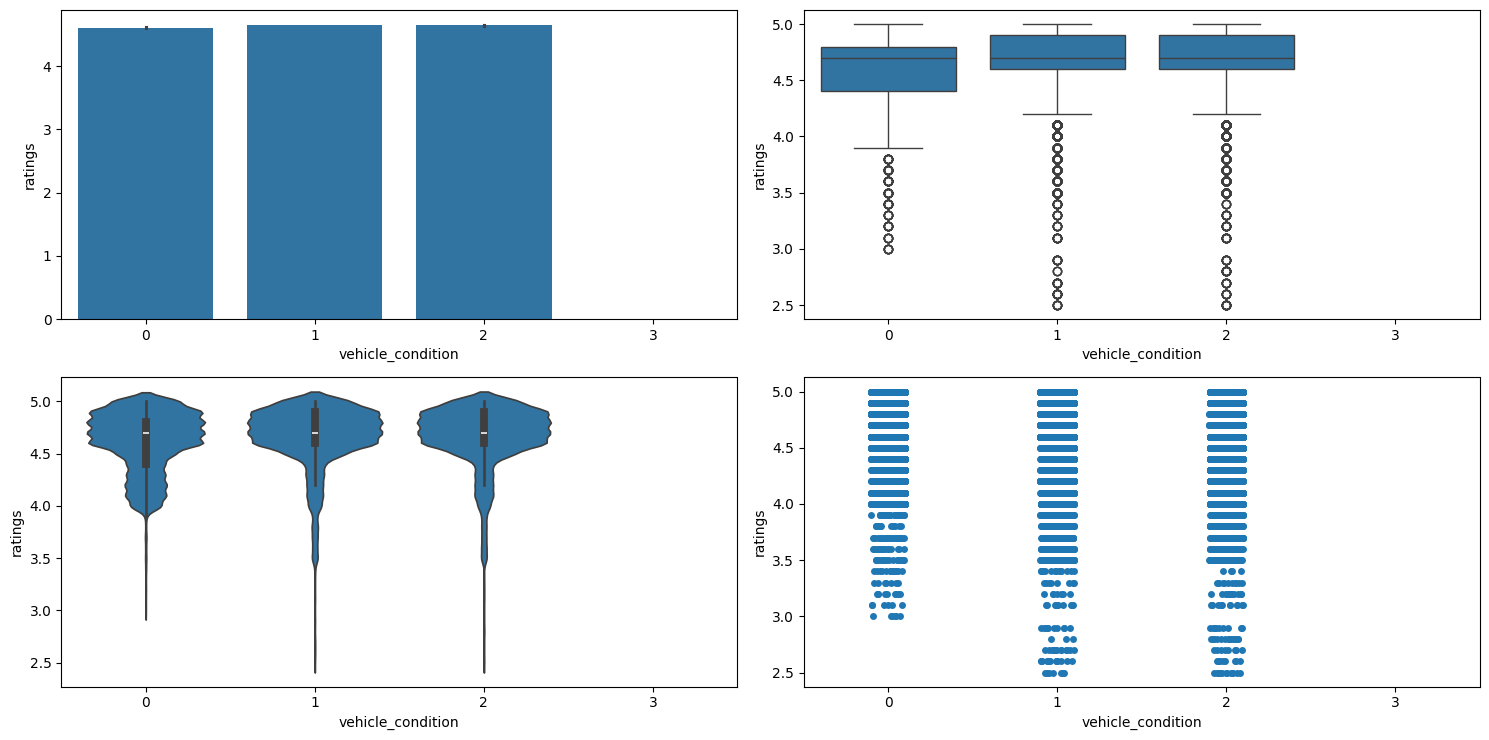

In [115]:
# does ratings get affected by vehicle type

numerical_categorical_analysis(df_final, 'vehicle_condition', 'ratings')

**Yes they do**

- The more worst the vehicle condition is, the more lower the rating gets.
- The category 3 has no data means there are NaN values. This simply means that customers avoid rating their riders even rating of 1 when the vehicle condition is bad.

In [116]:
(
    df_final[["ratings","vehicle_condition"]]
    .loc[df_final["vehicle_condition"]==3,"ratings"]
    .value_counts(dropna=False)
)

ratings
NaN    429
Name: count, dtype: int64

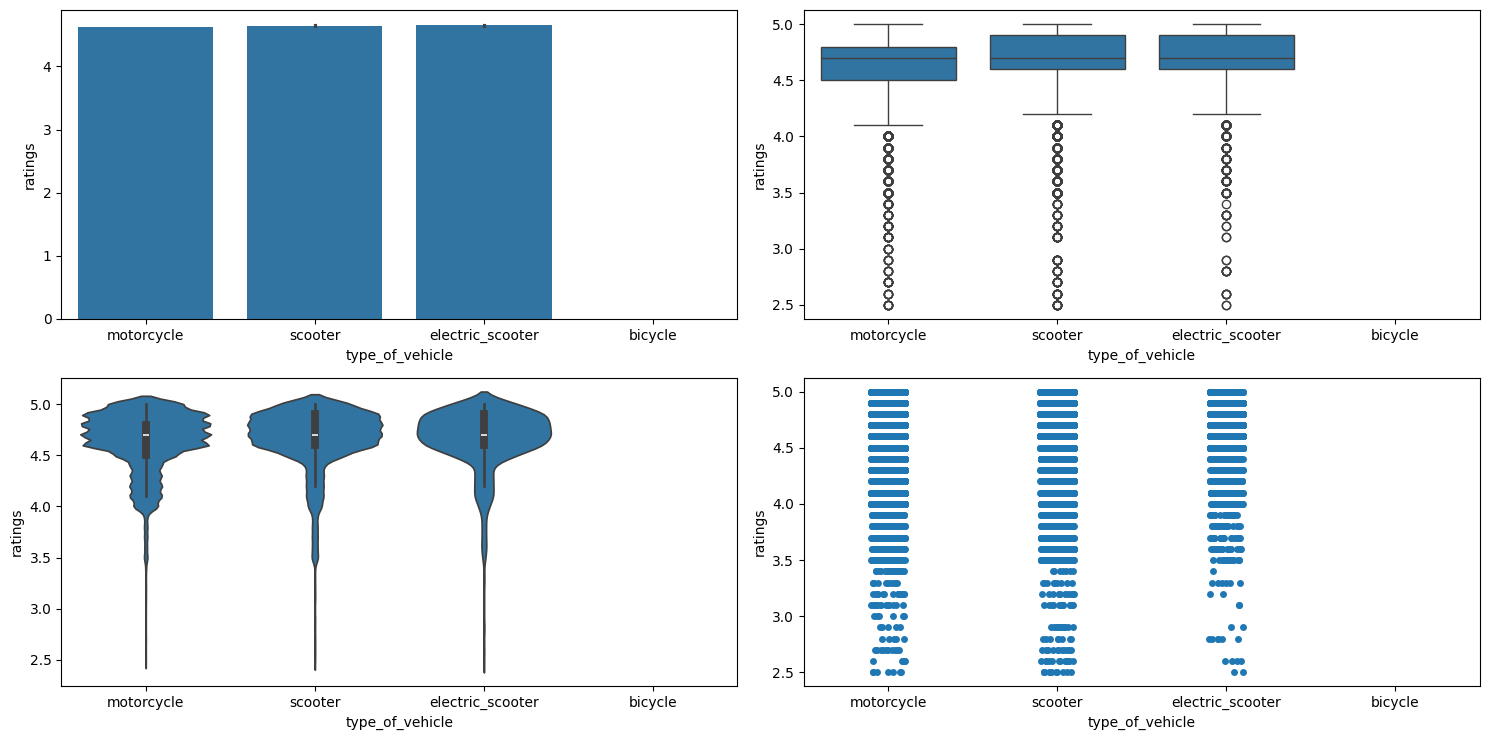

In [117]:
# does type of vehicle affects ratings

numerical_categorical_analysis(df_final, 'type_of_vehicle', 'ratings')

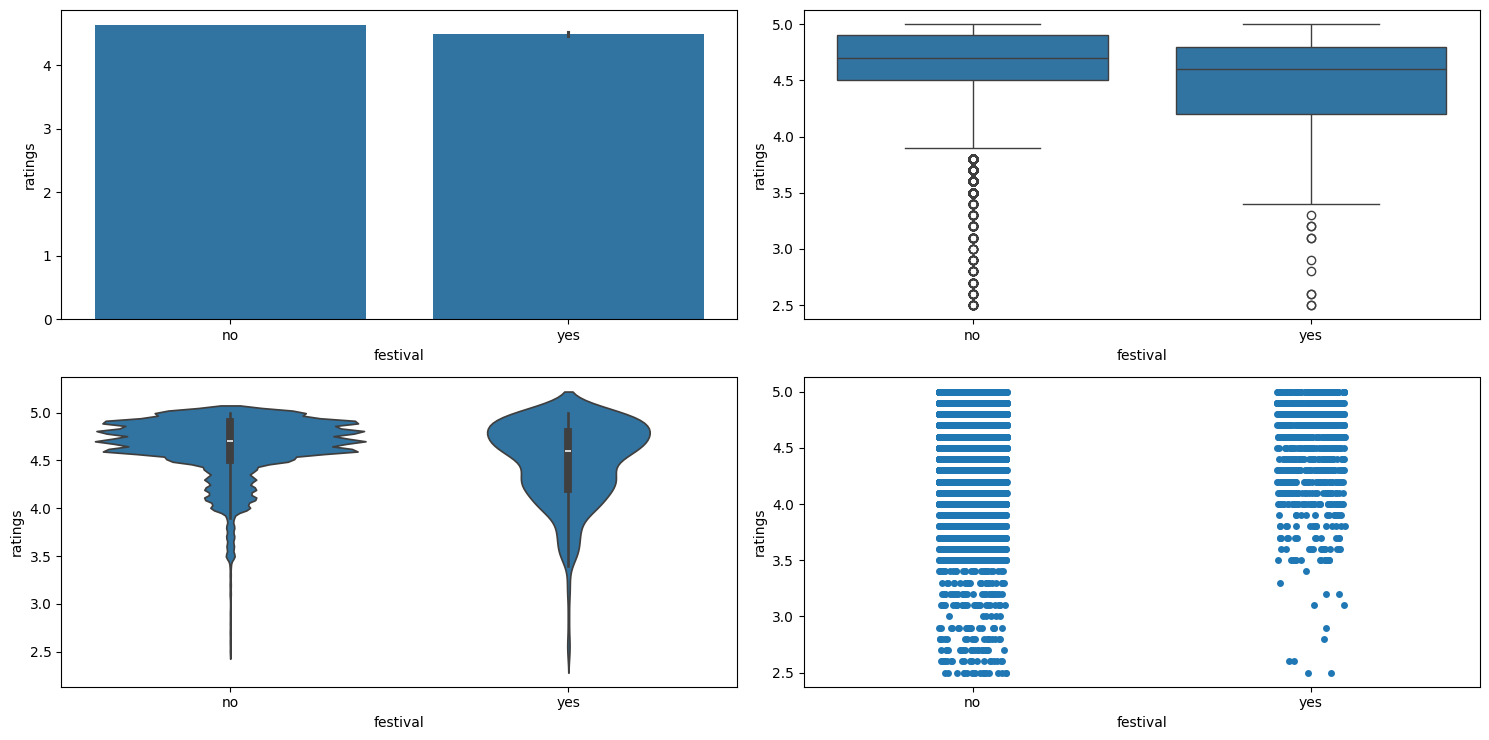

In [118]:
# festvals and rider ratings

numerical_categorical_analysis(df_final, 'festival', 'ratings')

## Location Based Features

In [119]:
df_final.columns[3:7].tolist() + ["city_name"]

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'city_name']

In [120]:
# location subset

location_subset = df_final.loc[:,df_final.columns[3:7].tolist() + ["city_name"]]

location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                22.745049             75.892471          22.765049   
1                12.913041             77.683237          13.043041   
2                12.914264             77.678400          12.924264   
3                11.003669             76.976494          11.053669   
4                12.972793             80.249982          13.012793   
...                    ...                   ...                ...   
45497            26.902328             75.794257          26.912328   
45498                  NaN                   NaN                NaN   
45499            13.022394             80.242439          13.052394   
45500            11.001753             76.986241          11.041753   
45501            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               75.912471      INDO  
1               77.813237      BANG  
2               77.688400      BANG  
3               77.026494     COIMB  
4               80.289982      CHEN  
...                   ...       ...  
45497           75.804257       JAP  
45498                 NaN       AGR  
45499           80.272439      CHEN  
45500           77.026241     COIMB  
45501           85.405731    RANCHI  

[45502 rows x 5 columns]

In [121]:
location_subset.dtypes

restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
city_name                object
dtype: object

In [122]:
# drop missing values

location_subset.dropna(inplace=True)

location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                22.745049             75.892471          22.765049   
1                12.913041             77.683237          13.043041   
2                12.914264             77.678400          12.924264   
3                11.003669             76.976494          11.053669   
4                12.972793             80.249982          13.012793   
...                    ...                   ...                ...   
45496            23.371292             85.327872          23.481292   
45497            26.902328             75.794257          26.912328   
45499            13.022394             80.242439          13.052394   
45500            11.001753             76.986241          11.041753   
45501            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               75.912471      INDO  
1               77.813237      BANG  
2               77.688400      BANG  
3               77.026494     COIMB  
4               80.289982      CHEN  
...                   ...       ...  
45496           85.437872    RANCHI  
45497           75.804257       JAP  
45499           80.272439      CHEN  
45500           77.026241     COIMB  
45501           85.405731    RANCHI  

[41872 rows x 5 columns]

## Order Date

In [123]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type',
       'time_taken_pt'],
      dtype='object')

In [124]:
df_final.filter(like="order")

order_date type_of_order  order_day  order_month order_day_of_week  \
0      2022-03-19         snack         19            3          saturday   
1      2022-03-25         snack         25            3            friday   
2      2022-03-19        drinks         19            3          saturday   
3      2022-04-05        buffet          5            4           tuesday   
4      2022-03-26         snack         26            3          saturday   
...           ...           ...        ...          ...               ...   
45497  2022-03-24          meal         24            3          thursday   
45498  2022-02-16        buffet         16            2         wednesday   
45499  2022-03-11        drinks         11            3            friday   
45500  2022-03-07         snack          7            3            monday   
45501  2022-03-02         snack          2            3         wednesday   

       order_time_hour order_time_of_day  
0                 11.0           morning  
1                 19.0           evening  
2                  8.0           morning  
3                 18.0           evening  
4                 13.0         afternoon  
...                ...               ...  
45497             11.0           morning  
45498             19.0           evening  
45499             23.0             night  
45500             13.0         afternoon  
45501             17.0         afternoon  

[45502 rows x 7 columns]

In [125]:
# order date columns

order_date_subset = df_final.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]

order_date_subset

order_date  order_day  order_month order_day_of_week  is_weekend  \
0      2022-03-19         19            3          saturday           1   
1      2022-03-25         25            3            friday           0   
2      2022-03-19         19            3          saturday           1   
3      2022-04-05          5            4           tuesday           0   
4      2022-03-26         26            3          saturday           1   
...           ...        ...          ...               ...         ...   
45497  2022-03-24         24            3          thursday           0   
45498  2022-02-16         16            2         wednesday           0   
45499  2022-03-11         11            3            friday           0   
45500  2022-03-07          7            3            monday           0   
45501  2022-03-02          2            3         wednesday           0   

      festival  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45497       no  
45498       no  
45499       no  
45500       no  
45501       no  

[45502 rows x 6 columns]

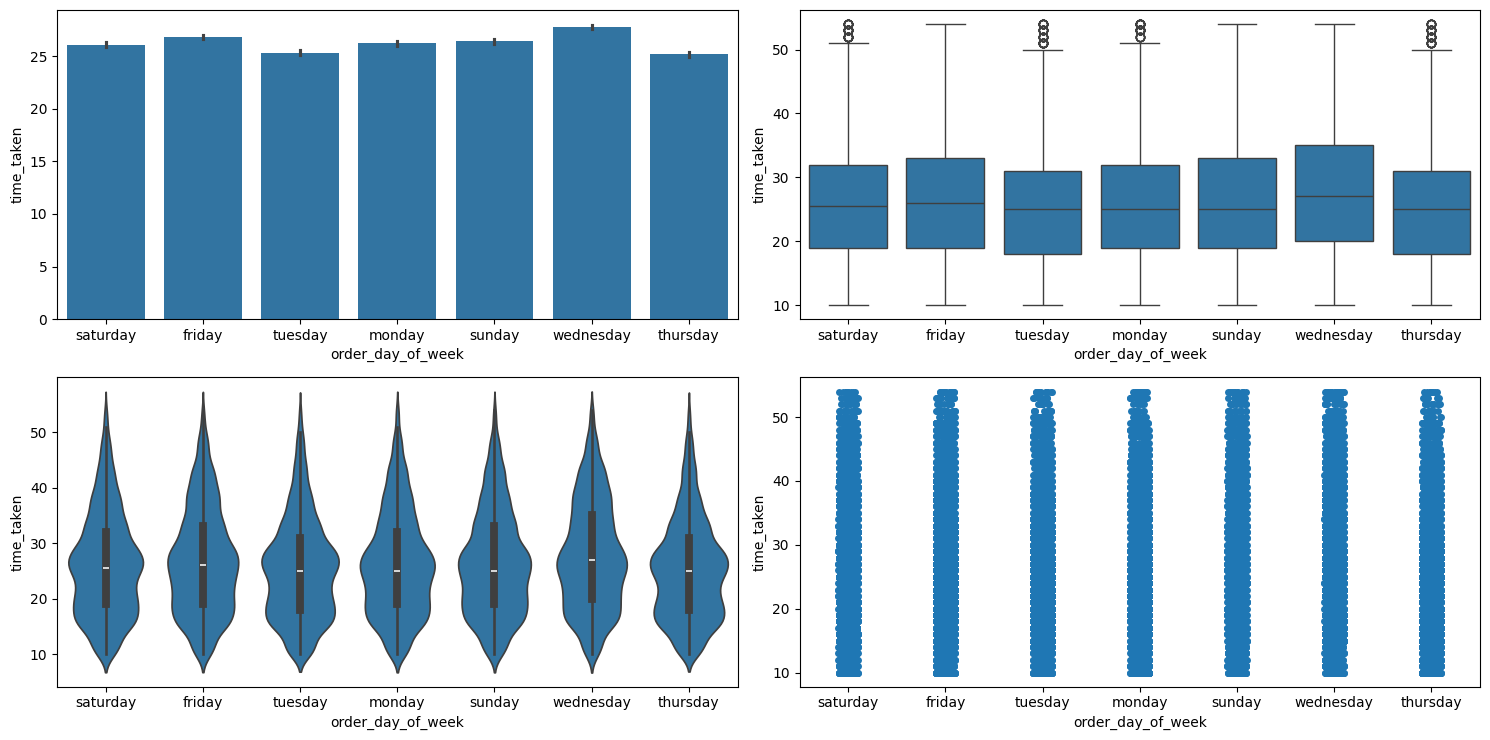

In [126]:
# analysis between day of week and target

numerical_categorical_analysis(df_final, "order_day_of_week", "time_taken")

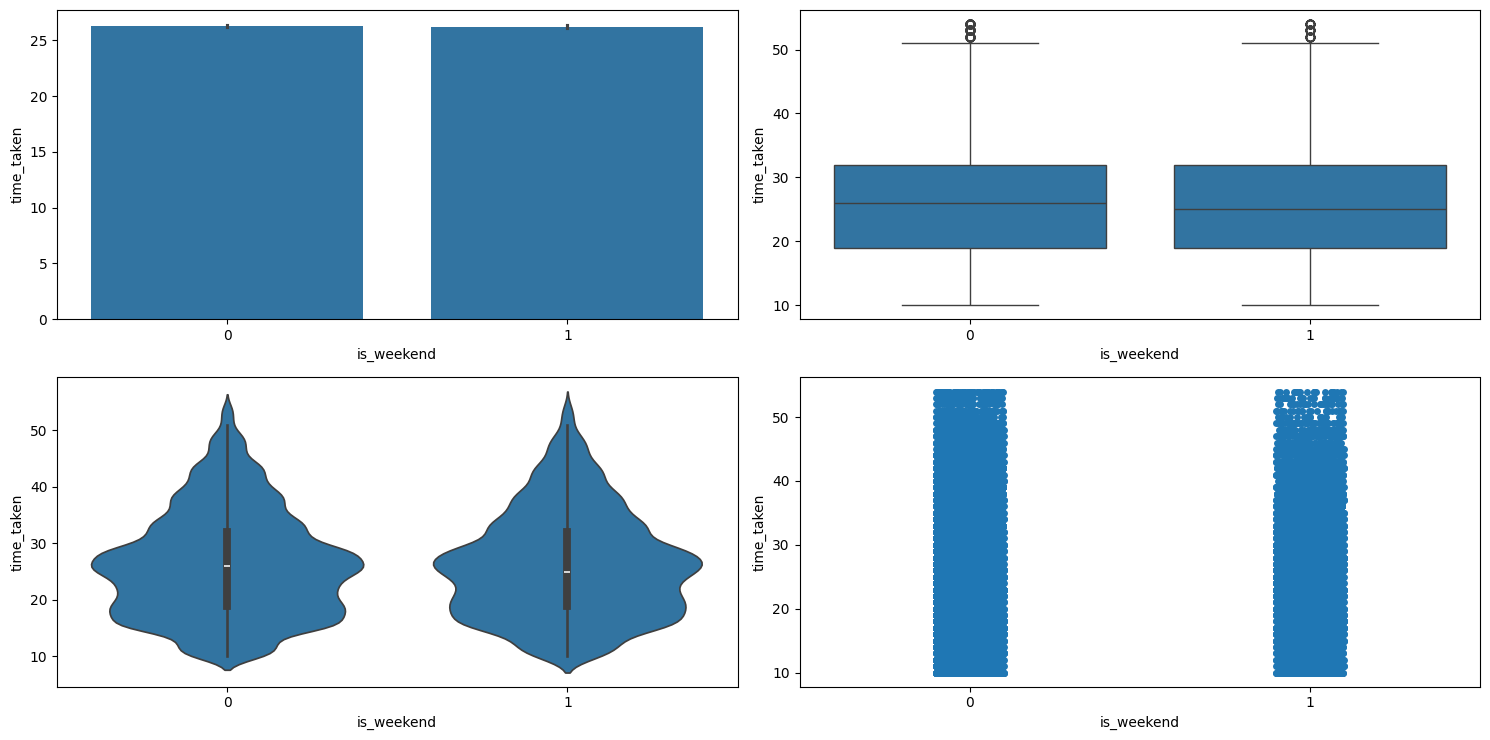

In [127]:
# does having a weekend affects target

numerical_categorical_analysis(df_final, "is_weekend", "time_taken")

In [128]:
# do weekends have an impact on traffic

chi_2_test(df_final, "is_weekend", "traffic")

0.6845961396354259
Fail to reject the null hypothesis. There is no significant association between is_weekend and traffic.


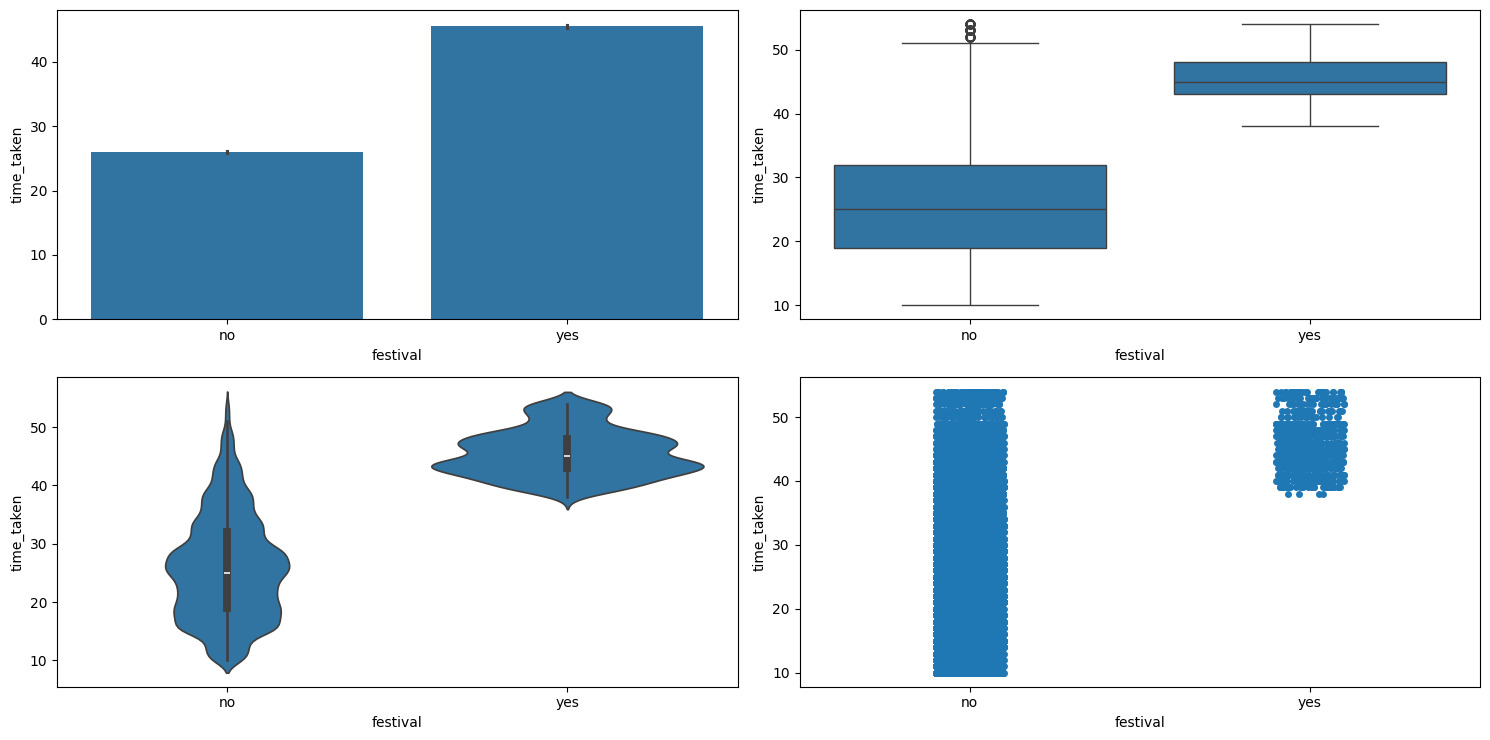

In [129]:
# festivals and target analysis

numerical_categorical_analysis(df_final, "festival", "time_taken")

**Observations**:
1. The avg time it takes for delivery varies when there is a festival.
2. The range of delivery time is shorter when there is a festival with lesser variation, which means on a festival delivery times usually takes longer.

In [130]:
# do festival affect traffic

chi_2_test(df_final, "festival", "traffic")

1.1223471129146869e-153
Reject the null hypothesis. There is a significant association between festival and traffic.


The p value is very small which mans it does affect traffic.

In [131]:
df_final.pivot_table(index="traffic",columns="festival",values="time_taken",aggfunc="mean")

festival         no        yes
traffic                       
high      27.010373  45.826087
jam       30.538039  46.093651
low       21.284332  42.020000
medium    26.550288  43.715385

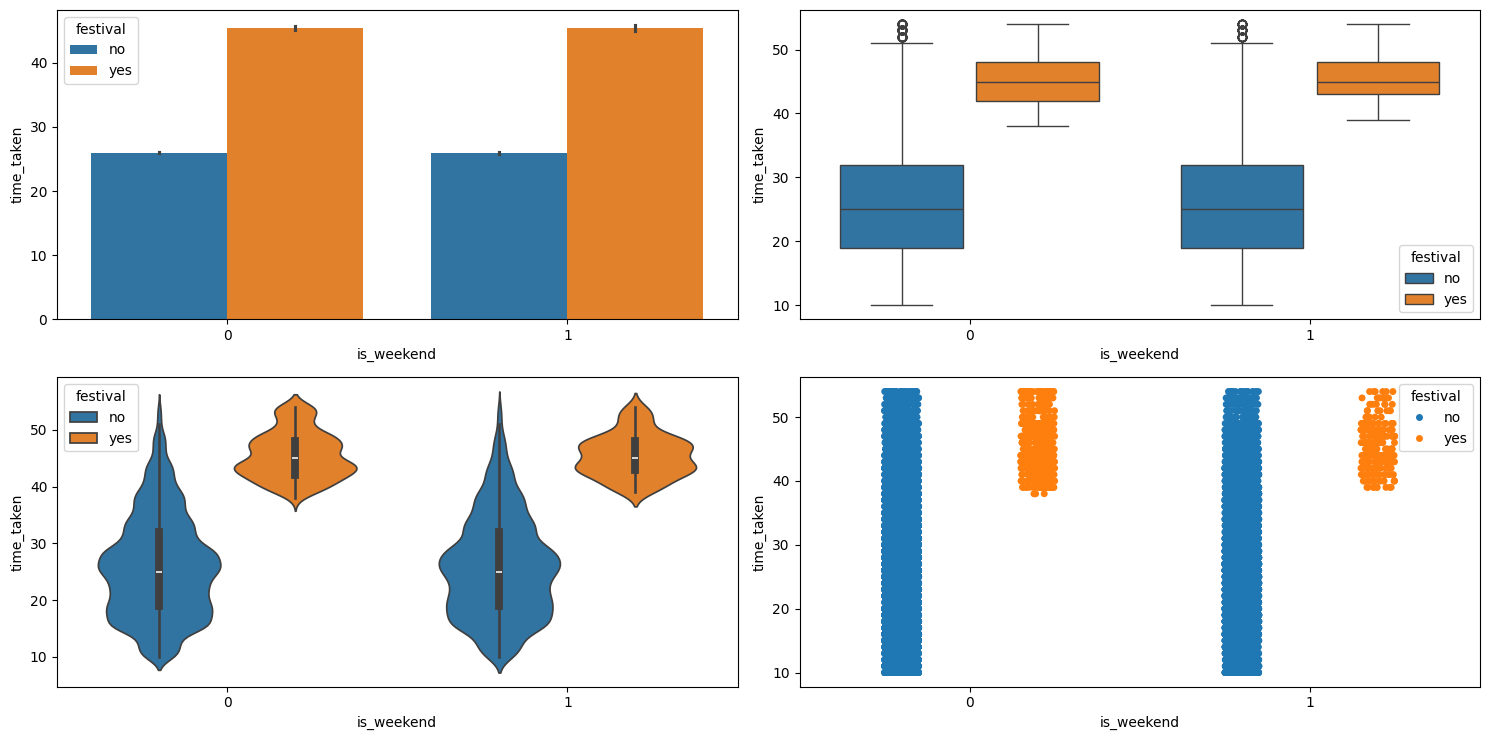

In [132]:
# does a weekend and a festival combined have an effect on delivery times

multivariate_analysis(df_final, "time_taken", "is_weekend", "festival")

## Order Time

In [133]:
df_final.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type',
       'time_taken_pt'],
      dtype='object')

In [134]:
# time related columns

time_subset = df_final.loc[:,["order_time_hour","order_time_of_day","pickup_time_minutes"]]

time_subset

order_time_hour order_time_of_day  pickup_time_minutes
0                 11.0           morning                 15.0
1                 19.0           evening                  5.0
2                  8.0           morning                 15.0
3                 18.0           evening                 10.0
4                 13.0         afternoon                 15.0
...                ...               ...                  ...
45497             11.0           morning                 10.0
45498             19.0           evening                 15.0
45499             23.0             night                 15.0
45500             13.0         afternoon                  5.0
45501             17.0         afternoon                  5.0

[45502 rows x 3 columns]

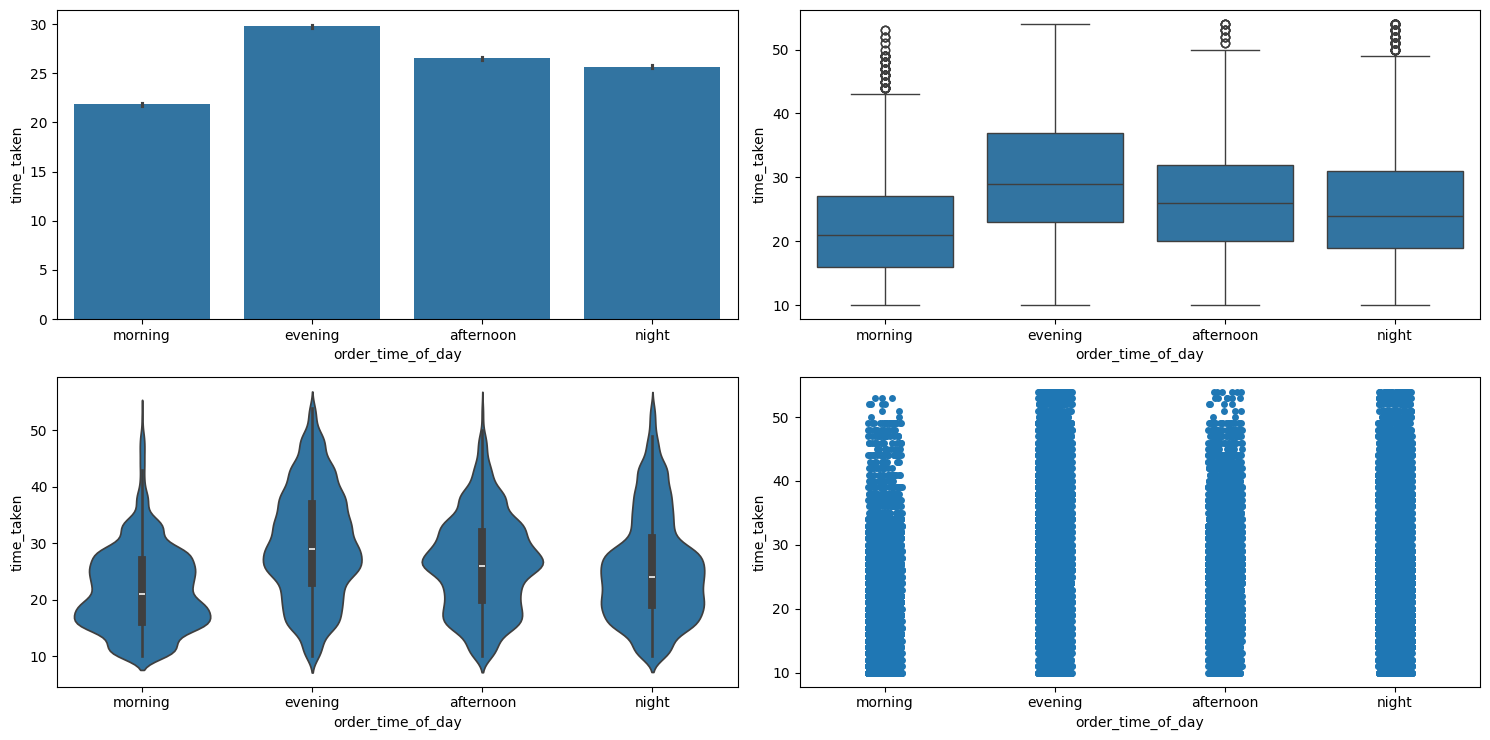

In [135]:
# does time of day affects delivery times

numerical_categorical_analysis(df_final, "order_time_of_day", "time_taken")

In [136]:
# relationship between time of day and traffic

chi_2_test(df_final, "order_time_of_day", "traffic")

0.0
Reject the null hypothesis. There is a significant association between order_time_of_day and traffic.


In [137]:
# anova test

anova_test(df_final, "time_taken", "order_time_of_day")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and order_time_of_day.


In [138]:
# Top 5 times(hrs) of the day in which customers  order the most

df_final["order_time_hour"].value_counts().head(5)

order_time_hour
21.0    4686
19.0    4595
22.0    4576
20.0    4539
23.0    4511
Name: count, dtype: int64

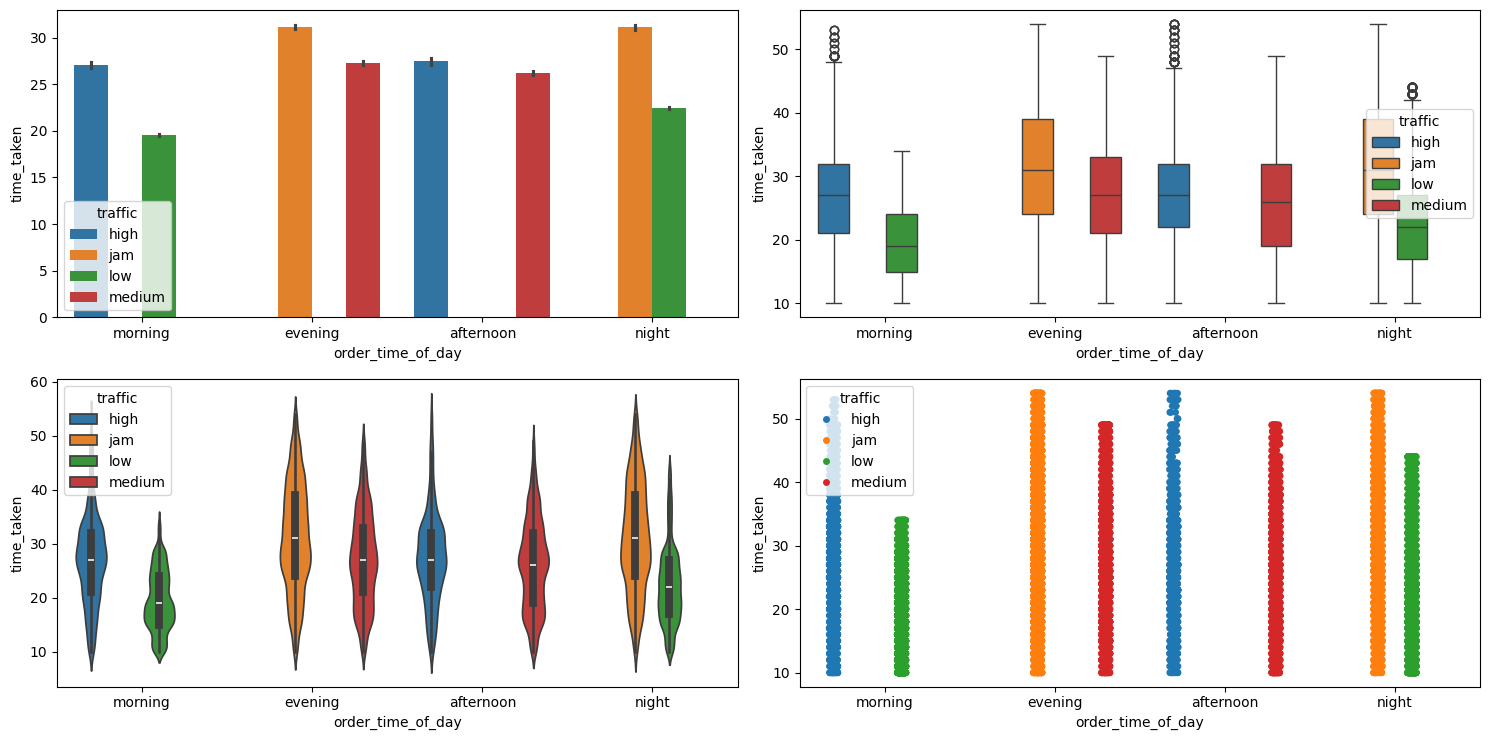

In [139]:
# can delivery time be affected by both time of day and traffic

multivariate_analysis(df_final, "time_taken", "order_time_of_day", "traffic")

Count Percentage
order_time_hour                  
21.0              4686     10.68%
19.0              4595     10.48%
22.0              4576     10.43%
20.0              4539     10.35%
23.0              4511     10.28%
18.0              4480     10.21%
17.0              4278      9.75%
10.0              1991      4.54%
11.0              1962      4.47%
9.0               1947      4.44%
8.0               1818      4.14%
12.0               892      2.03%
15.0               873      1.99%
14.0               791       1.8%
13.0               784      1.79%
16.0               709      1.62%
0.0                430      0.98%

**************************************************
The unique categories in order_time_hour column are [11.0, 19.0, 8.0, 18.0, 13.0, 21.0, 17.0, 20.0, 14.0, 9.0, 22.0, 12.0, 23.0, nan, 10.0, 16.0, 15.0, 0.0]
**************************************************
The number of categories in order_time_hour column are 17


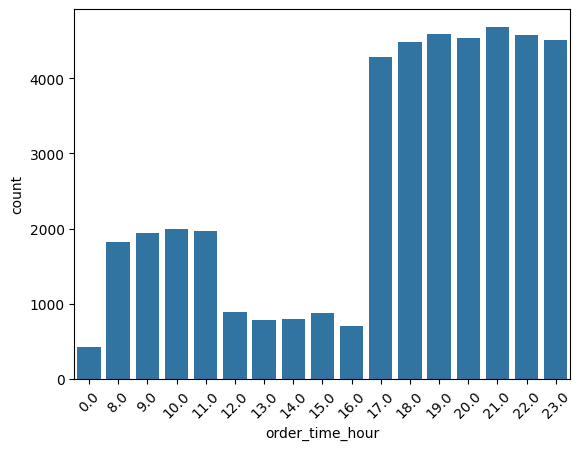

In [140]:
# categorical analysis on order_time_hour

categorical_analysis(df_final, "order_time_hour")

Count Percentage
order_time_of_day                  
night              13773     31.71%
evening            13614     31.35%
morning             8610     19.82%
afternoon           7435     17.12%

**************************************************
The unique categories in order_time_of_day column are ['morning', 'evening', 'afternoon', 'night', nan]
**************************************************
The number of categories in order_time_of_day column are 4


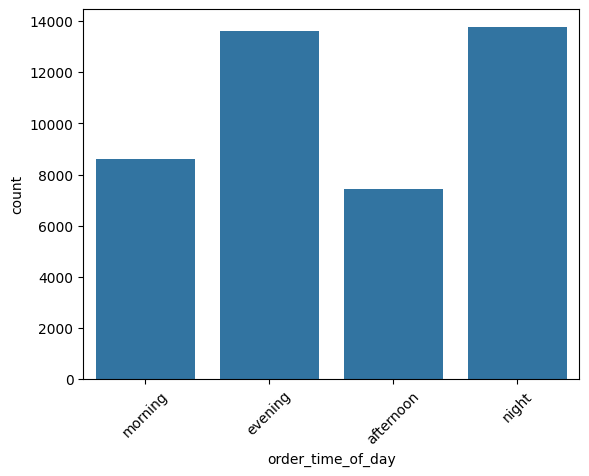

In [141]:
# categorical analysis on time of day

categorical_analysis(df_final, "order_time_of_day")

## Pickup Time

In [142]:
# pickup_time datatype

df_final['pickup_time_minutes'].dtype

dtype('float64')

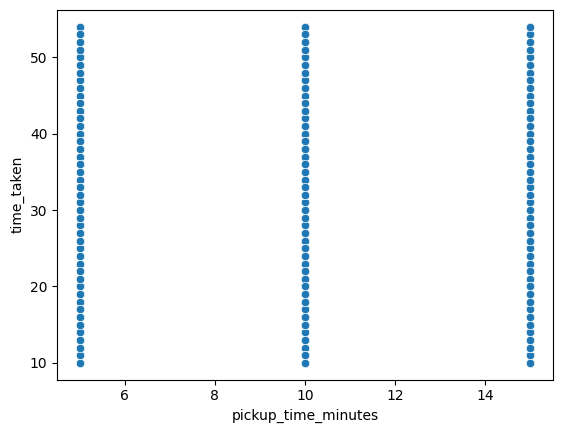

In [143]:
# relationship between pickup time and delivery time

sns.scatterplot(df_final,x="pickup_time_minutes",y="time_taken")
plt.show()

**Convert the column to ordinal categorical column**

Count Percentage
pickup_time_minutes                  
5.0                  14703     33.52%
15.0                 14610     33.31%
10.0                 14549     33.17%

**************************************************
The unique categories in pickup_time_minutes column are [15.0, 5.0, 10.0, nan]
**************************************************
The number of categories in pickup_time_minutes column are 3


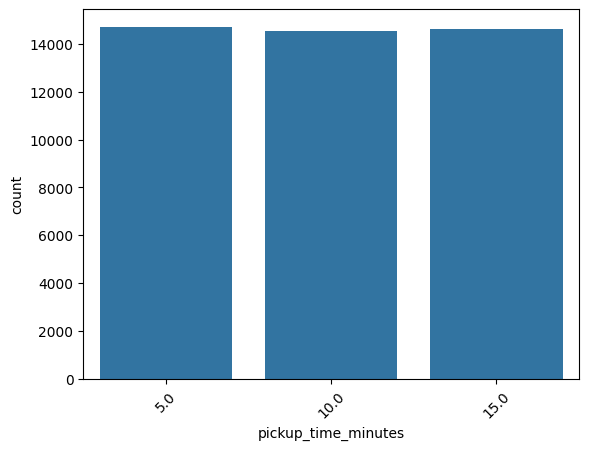

In [144]:
# pickup time categorical analysis

categorical_analysis(df_final, "pickup_time_minutes")

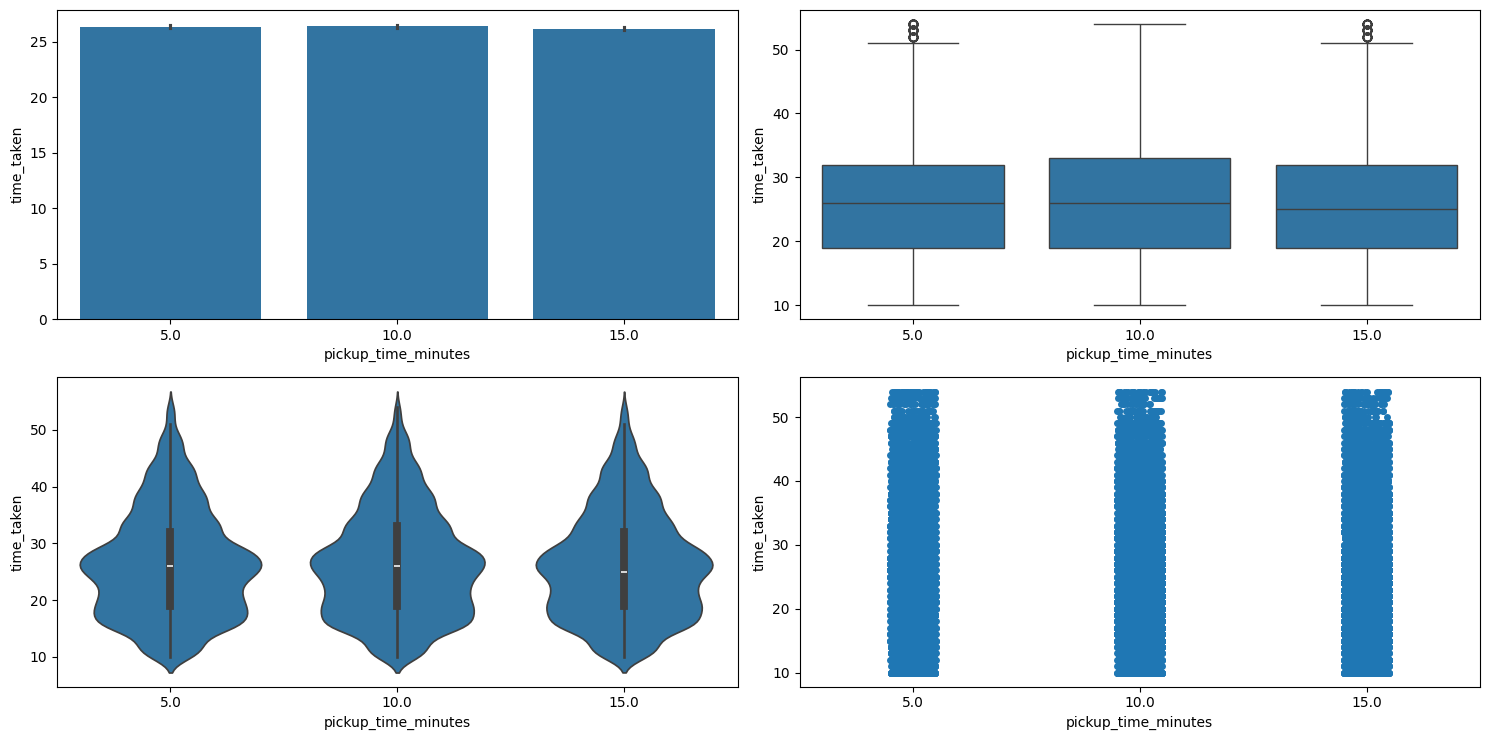

In [145]:
# does pickup time have an effect on delivery time

numerical_categorical_analysis(df_final, "pickup_time_minutes", "time_taken")

In [146]:
# hypothesis testing to prove point

anova_test(df_final, "time_taken", "pickup_time_minutes")

0.09932647028954891
Fail to reject the null hypothesis. There is no significant relationship between time_taken and pickup_time_minutes.


## Traffic

In [147]:
# datatype of traffic column

df_final['traffic'].dtype

dtype('O')

Count Percentage
traffic                  
low      15477      34.4%
jam      14143     31.43%
medium   10947     24.33%
high      4425      9.84%

**************************************************
The unique categories in traffic column are ['high', 'jam', 'low', 'medium', nan]
**************************************************
The number of categories in traffic column are 4


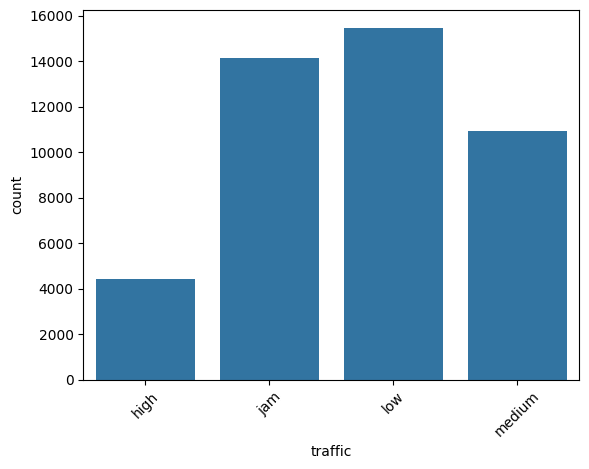

In [148]:
# categorical analysis on traffic

categorical_analysis(df_final, "traffic")

In [149]:
# does traffic depends on type of city

chi_2_test(df_final, "traffic", "city_type")

2.3390790568495405e-104
Reject the null hypothesis. There is a significant association between traffic and city_type.


In [150]:
# does traffic depends on city

chi_2_test(df_final, "traffic", "city_name")

0.4978080180955253
Fail to reject the null hypothesis. There is no significant association between traffic and city_name.


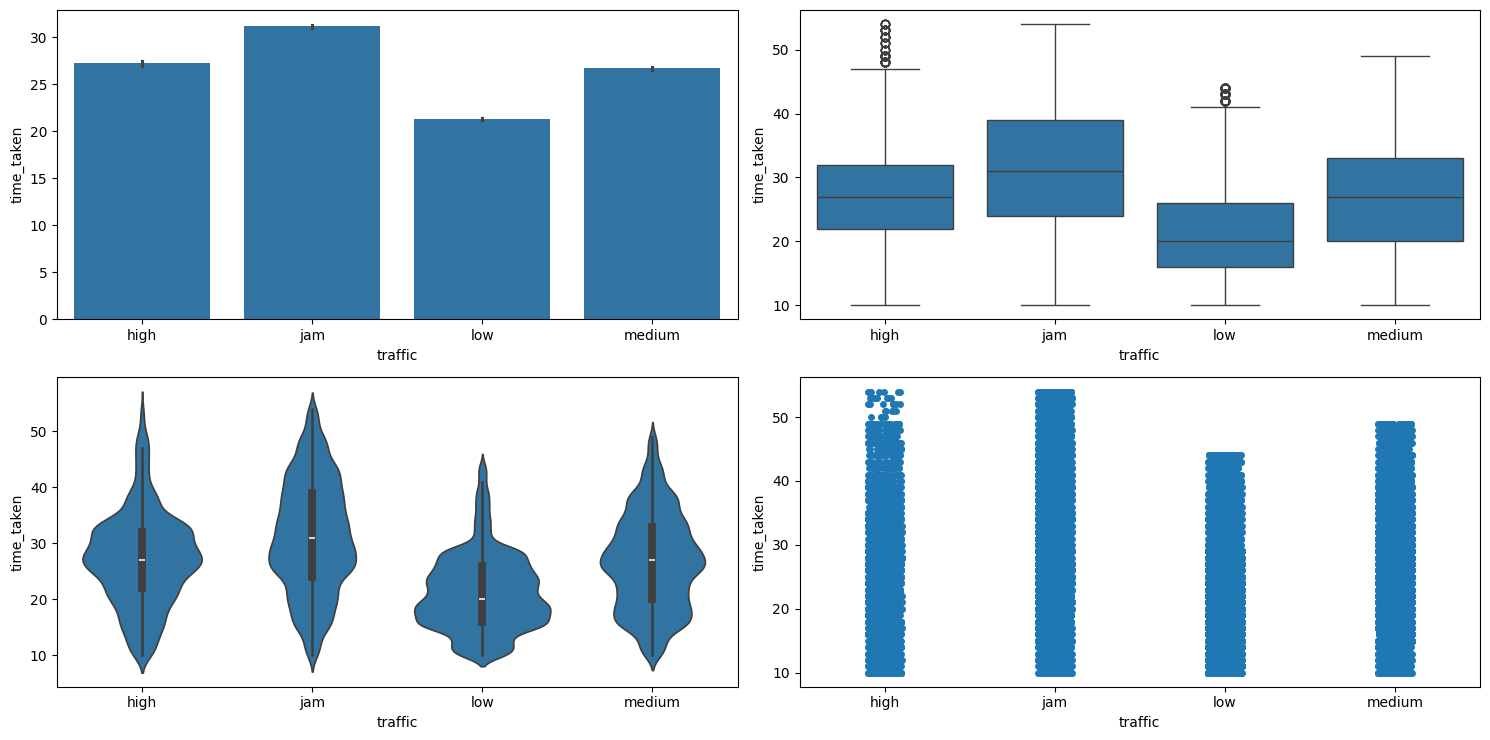

In [151]:
# does traffic affects delivery times

numerical_categorical_analysis(df_final, "traffic", "time_taken")

In [152]:
# hypothesis test on does traffic affects delivery times

anova_test(df_final, "time_taken", "traffic")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and traffic.


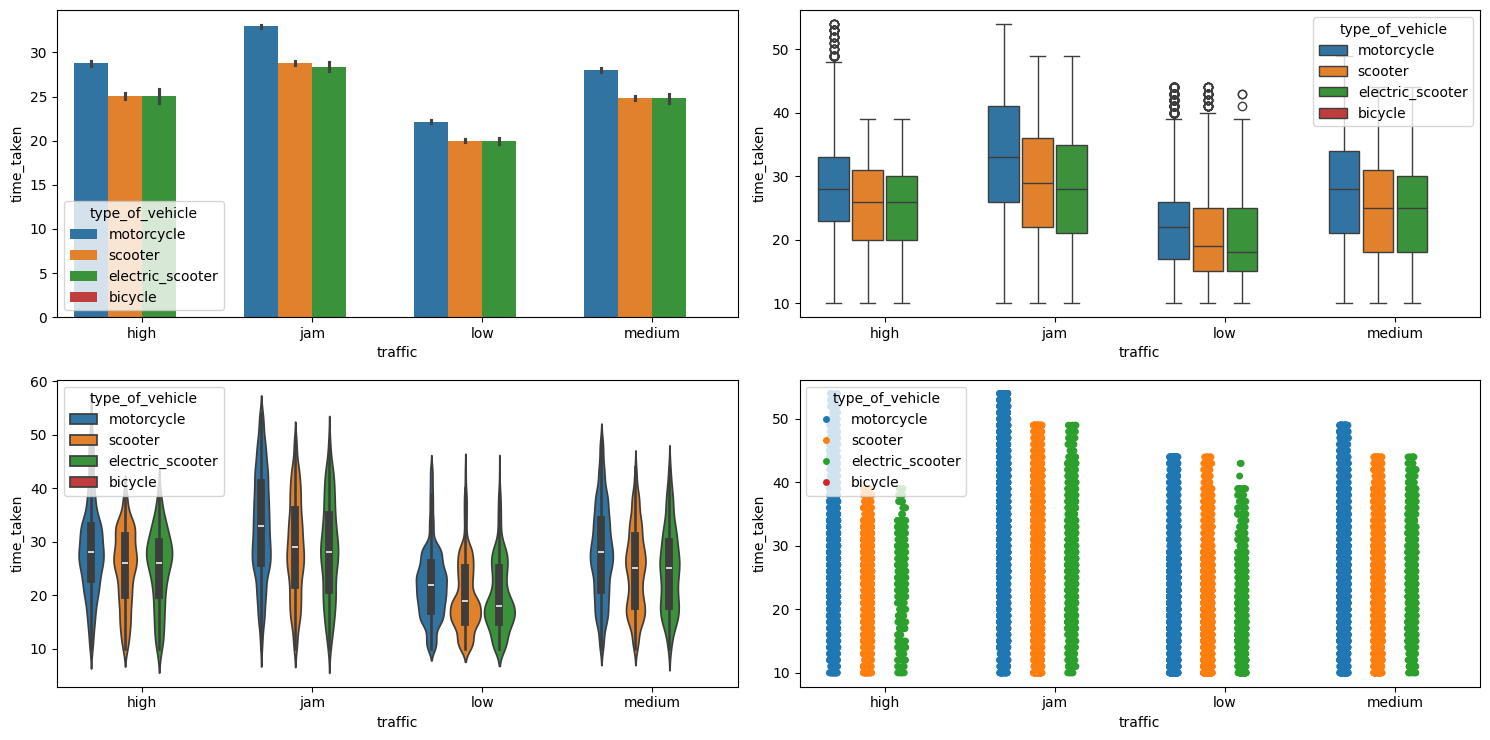

In [153]:
# are some vehicle types more suitable in traffic than others

multivariate_analysis(df_final, "time_taken", "traffic", "type_of_vehicle")

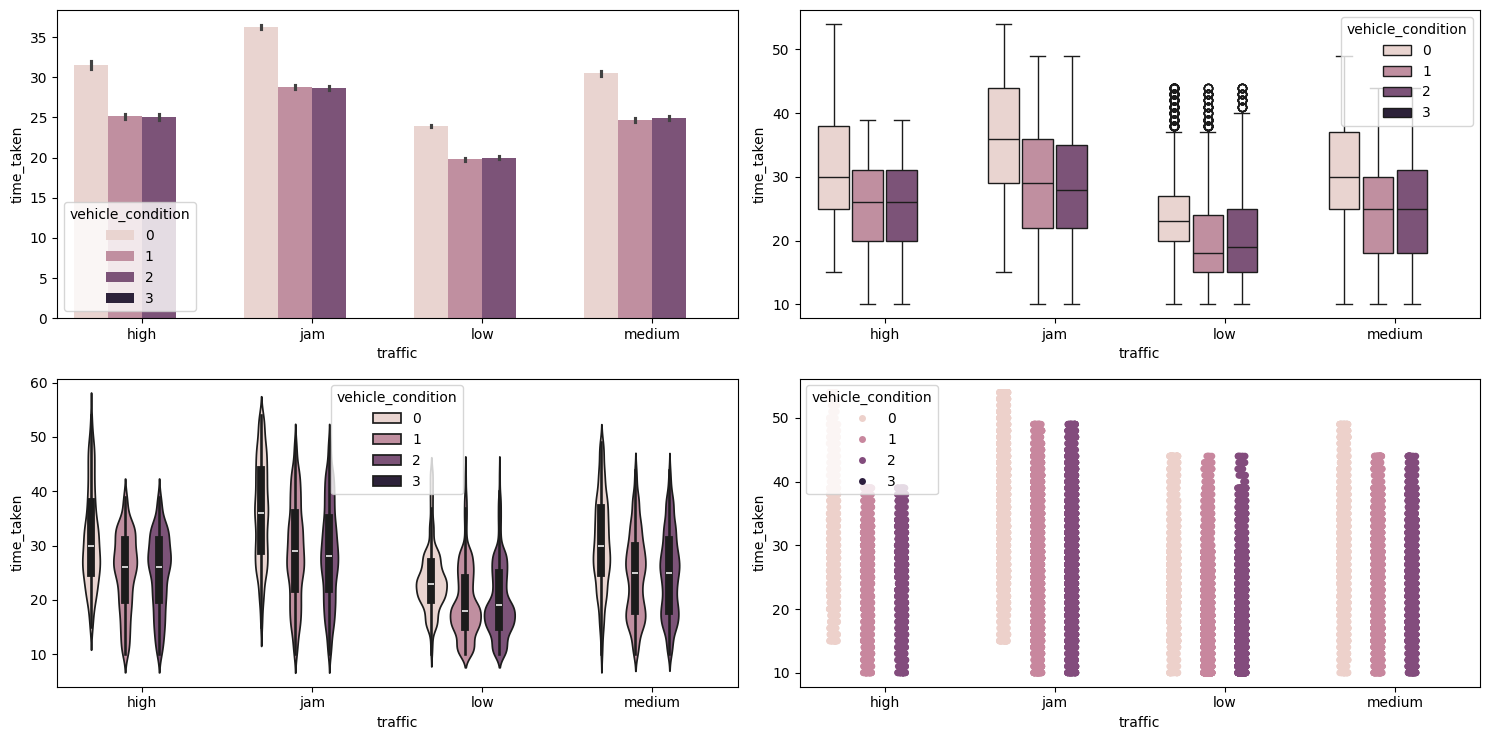

In [154]:
# does vehicle condition in traffic situations affects delivery times

multivariate_analysis(df_final, "time_taken", "traffic", "vehicle_condition")

**Dont make wrong interpretations that good condition vehicles takes longer times on avg**

This simply means that good vehicles are preferred for deliveries during festivals which results in longer delivery times

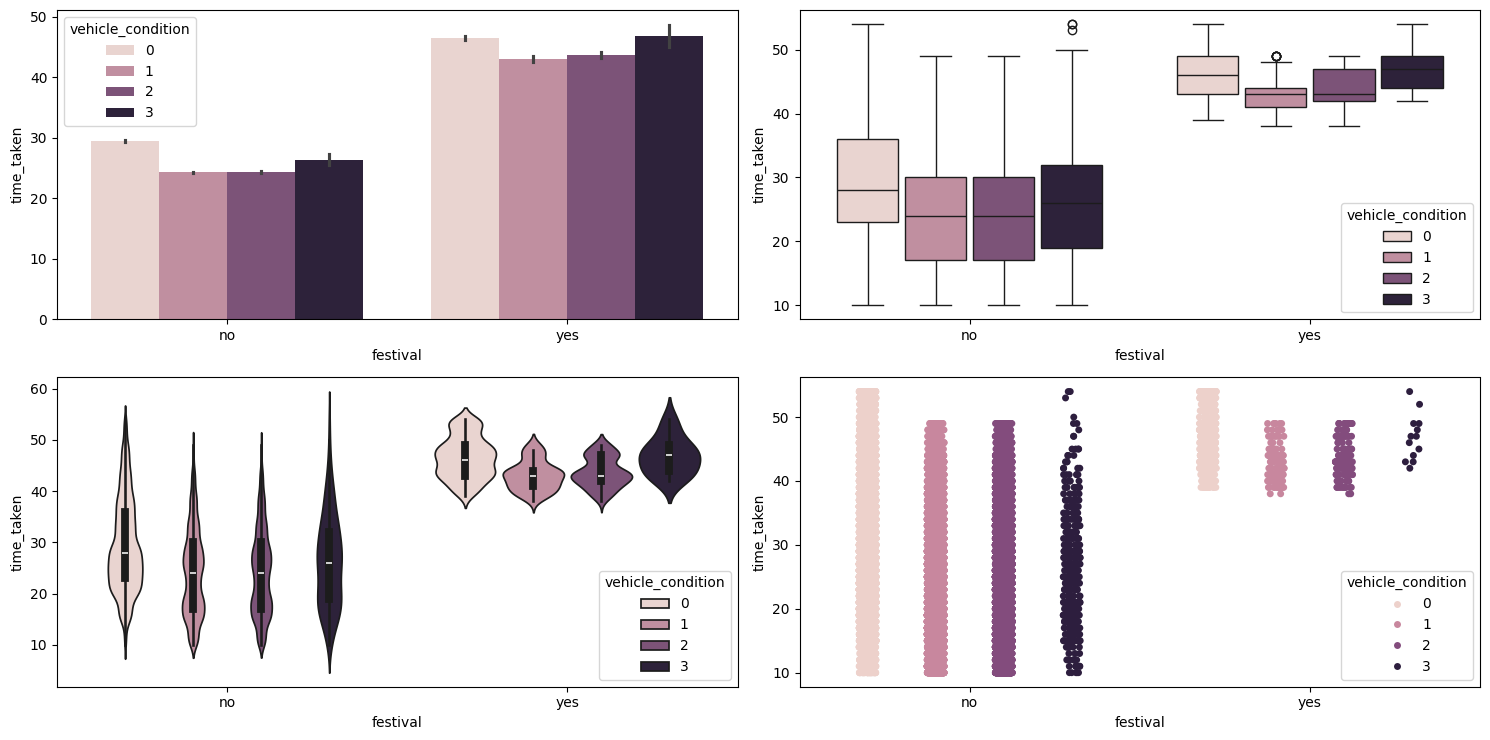

In [155]:
multivariate_analysis(df_final, "time_taken", "festival", "vehicle_condition")

## Multiple Deliveries

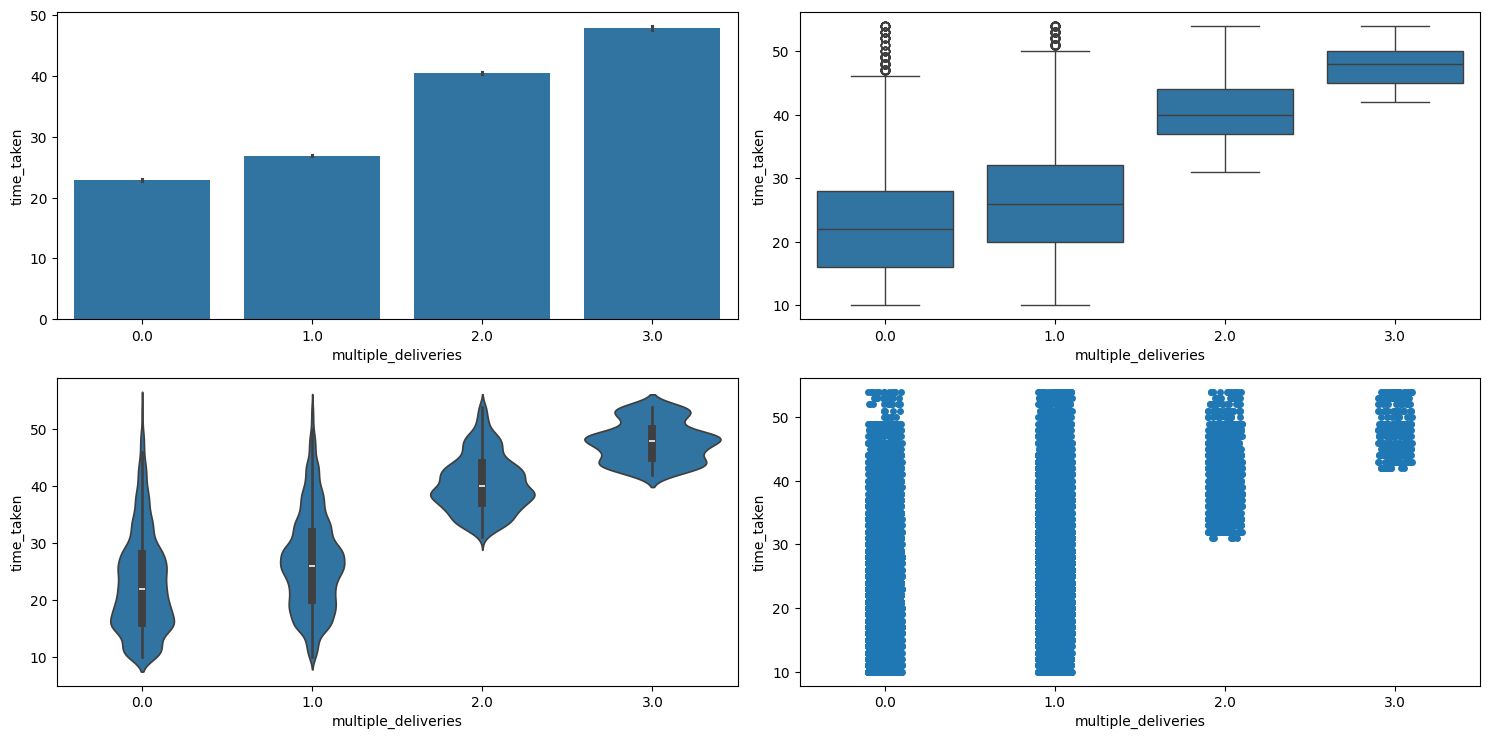

In [156]:
# does multiple delivereis affect delivery times

numerical_categorical_analysis(df_final, "multiple_deliveries", "time_taken")

In [157]:
# hypothesis test

anova_test(df_final, "time_taken", "multiple_deliveries")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and multiple_deliveries.


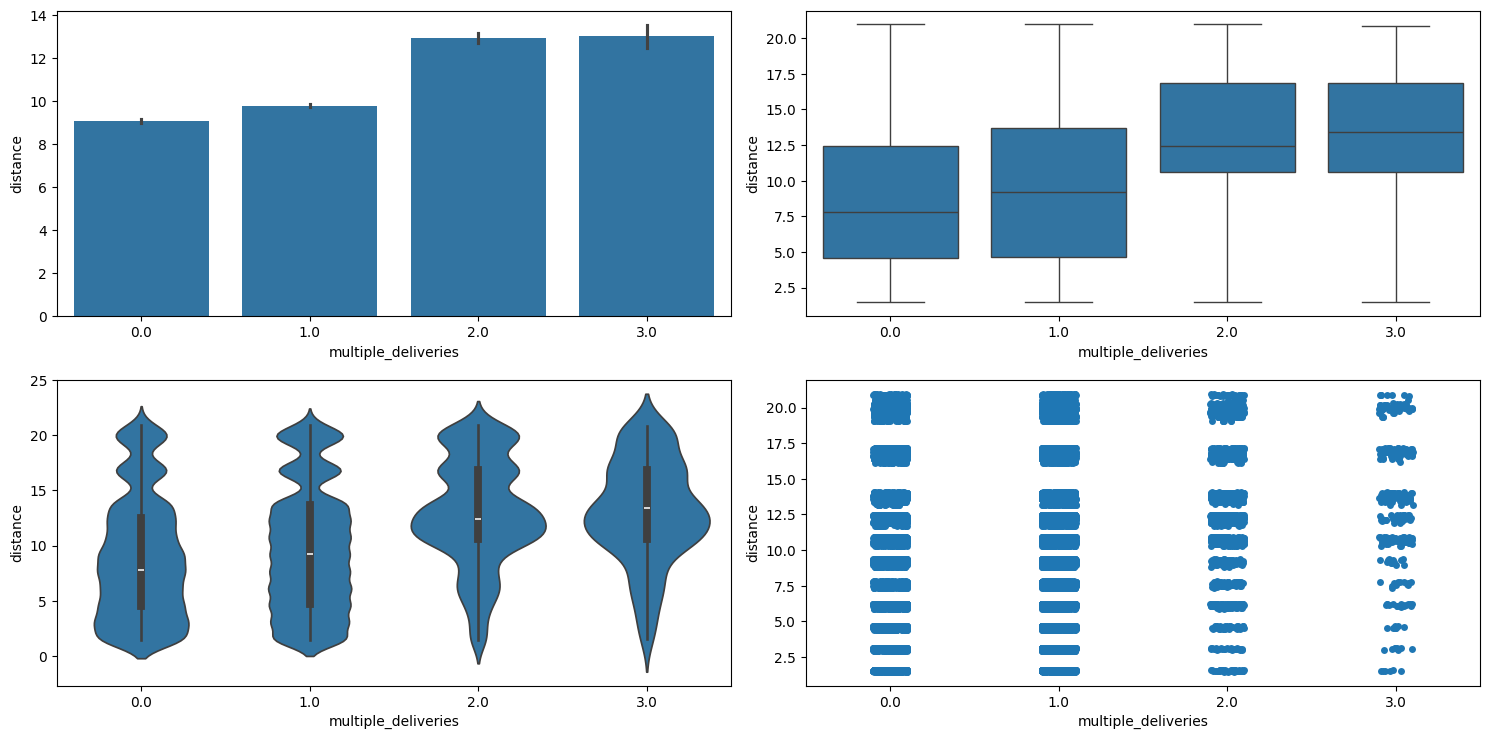

In [158]:
# do multiple deliveries are of longer distances

numerical_categorical_analysis(df_final, "multiple_deliveries", "distance")

## Weather

In [159]:
# data type of weather column

df_final['weather'].dtype

dtype('O')

Count Percentage
weather                     
fog          7654     17.02%
stormy       7586     16.87%
cloudy       7536     16.76%
sandstorms   7495     16.66%
windy        7422      16.5%
sunny        7284     16.19%

**************************************************
The unique categories in weather column are ['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy', nan]
**************************************************
The number of categories in weather column are 6


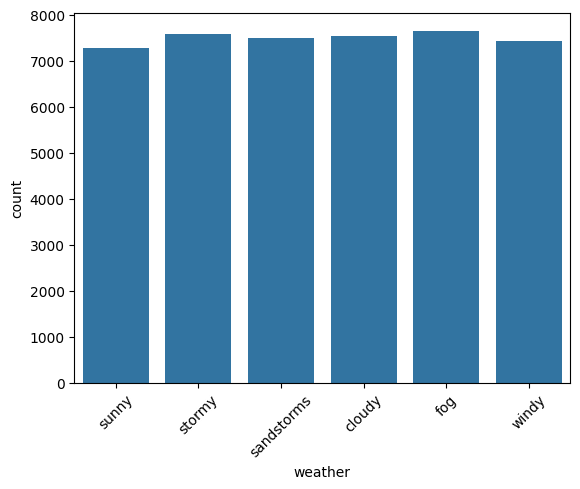

In [160]:
# categorical analysis on type of weather

categorical_analysis(df_final, "weather")

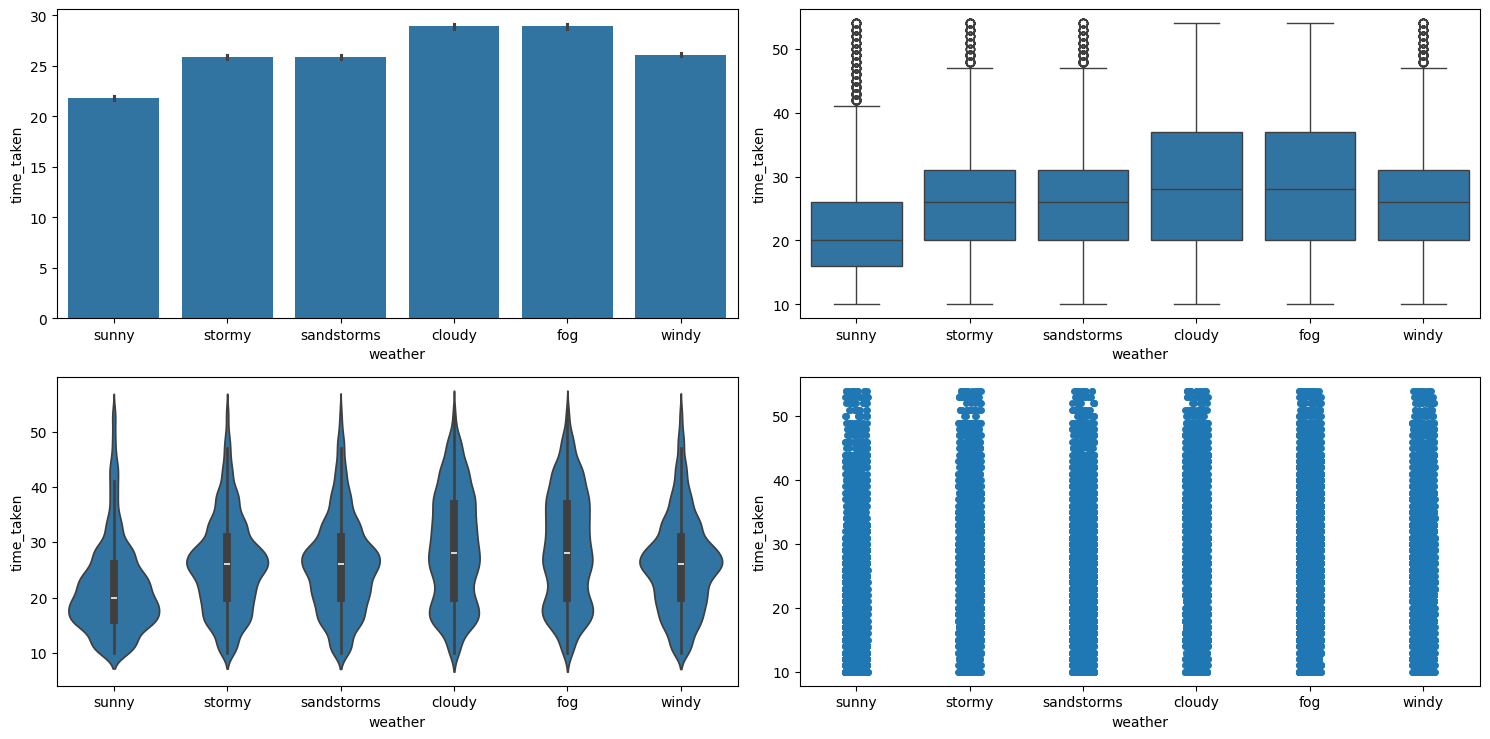

In [161]:
# does weather affect delivery times

numerical_categorical_analysis(df_final, "weather", "time_taken")

In [162]:
# hypothesis test

anova_test(df_final, "time_taken", "weather")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and weather.


In [163]:
# does the weather affects traffic

chi_2_test(df_final, "weather", "traffic")

0.4796388074753828
Fail to reject the null hypothesis. There is no significant association between weather and traffic.


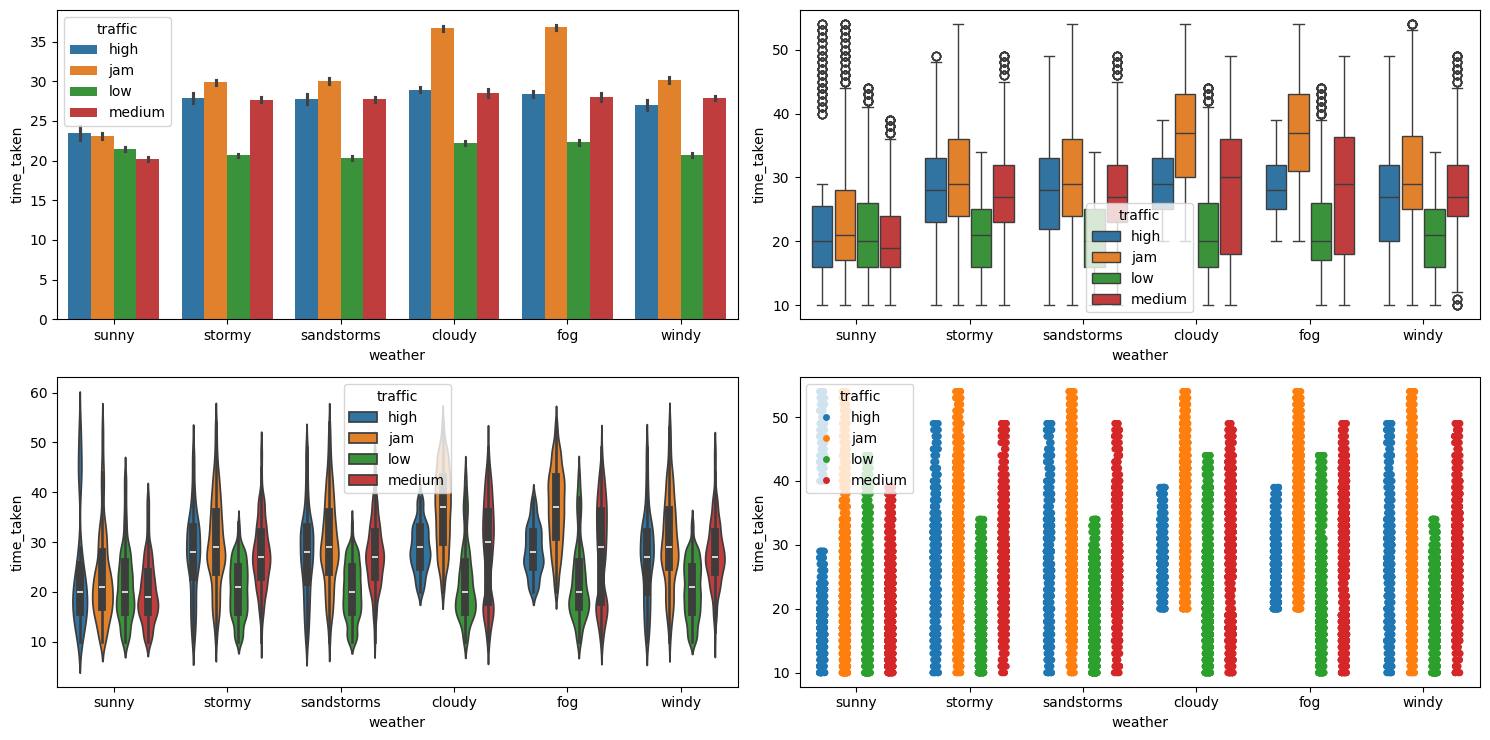

In [164]:
# delivery times based on weather and traffic

multivariate_analysis(df_final, "time_taken", "weather", "traffic")

**Seems like traffic along with other features combined acts as great discriminatory feature**

In [165]:
# pivot table

df_final.pivot_table(index="weather",columns="traffic",values="time_taken",aggfunc="mean")

traffic          high        jam        low     medium
weather                                               
cloudy      28.940860  36.689655  22.208445  28.483134
fog         28.426546  36.806916  22.303427  28.044816
sandstorms  27.711840  30.018758  20.297049  27.738522
stormy      27.845839  29.850194  20.681734  27.680502
sunny       23.448980  23.082132  21.449293  20.195518
windy       26.972789  30.219056  20.665862  27.888769

## Vehicle - Condition and Type

Count Percentage
vehicle_condition                  
2                  15034     33.04%
1                  15030     33.03%
0                  15009     32.99%
3                    429      0.94%

**************************************************
The unique categories in vehicle_condition column are [2, 0, 1, 3]
**************************************************
The number of categories in vehicle_condition column are 4


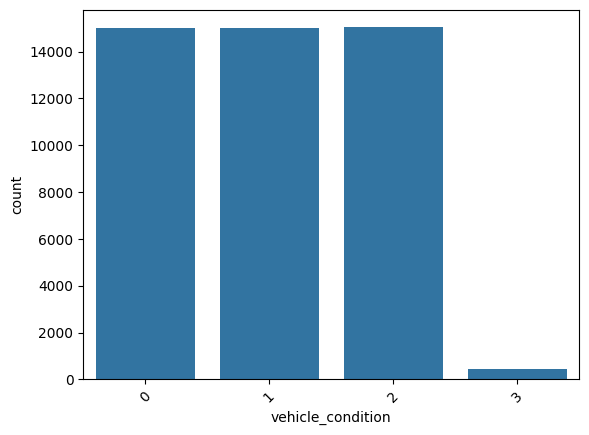

In [166]:
# categorical analysis on vehicle condition

categorical_analysis(df_final, "vehicle_condition")

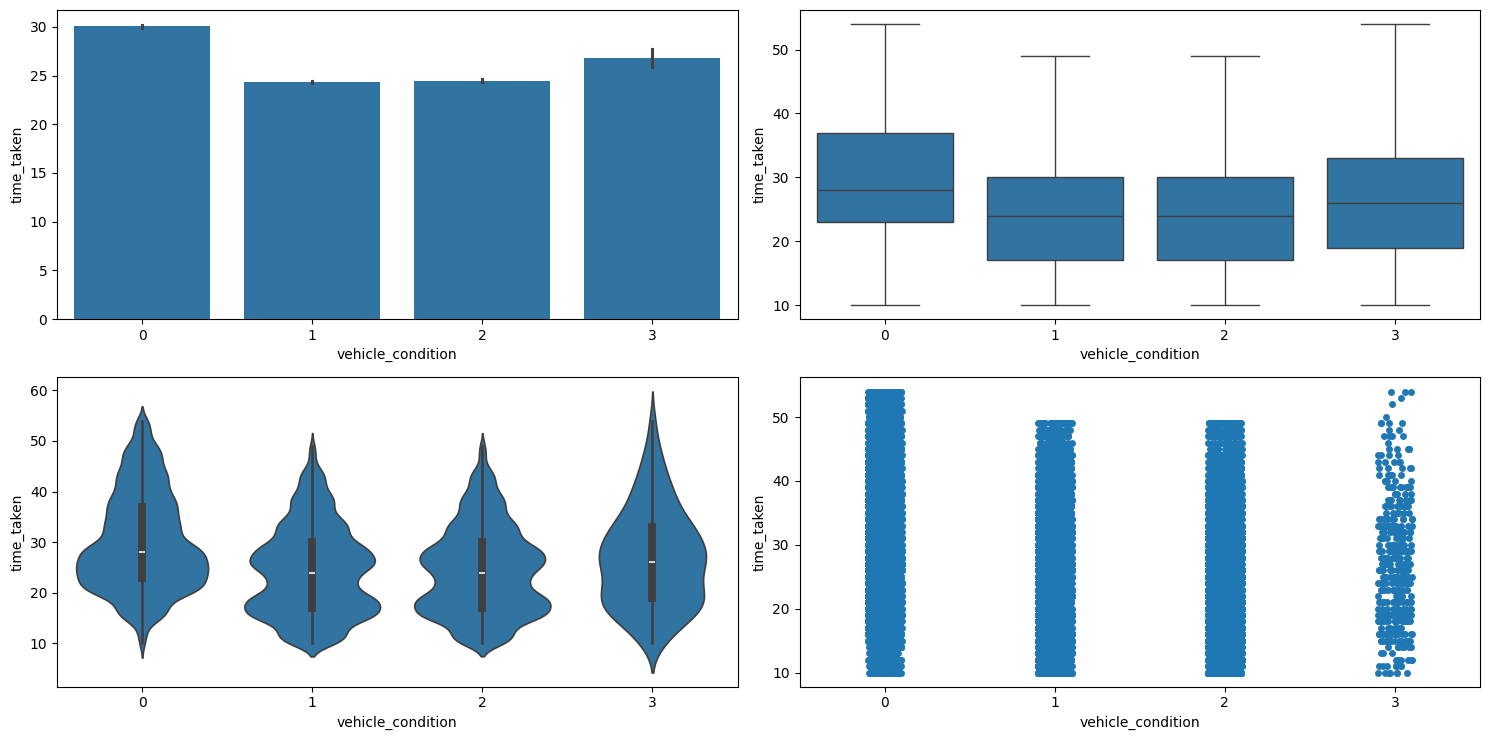

In [167]:
# does vehicle condition affect delivery times

numerical_categorical_analysis(df_final, "vehicle_condition", "time_taken")

In [168]:
# anova test

anova_test(df_final, "time_taken", "vehicle_condition")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and vehicle_condition.


Count Percentage
type_of_vehicle                   
motorcycle        26427     58.08%
scooter           15244      33.5%
electric_scooter   3778       8.3%
bicycle              53      0.12%

**************************************************
The unique categories in type_of_vehicle column are ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
**************************************************
The number of categories in type_of_vehicle column are 4


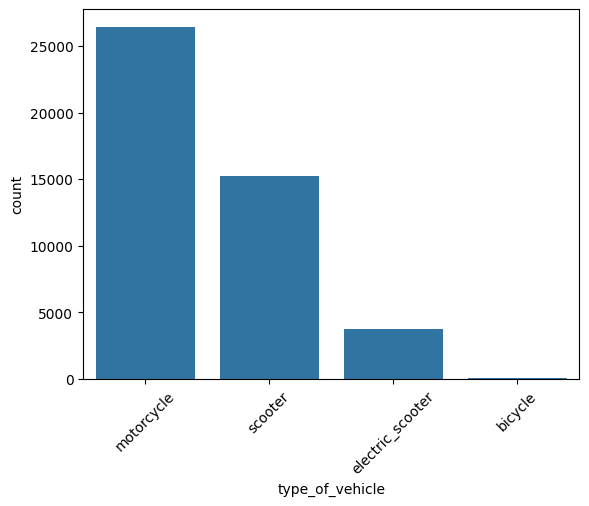

In [169]:
# analysis on vehicle type

categorical_analysis(df_final, "type_of_vehicle")

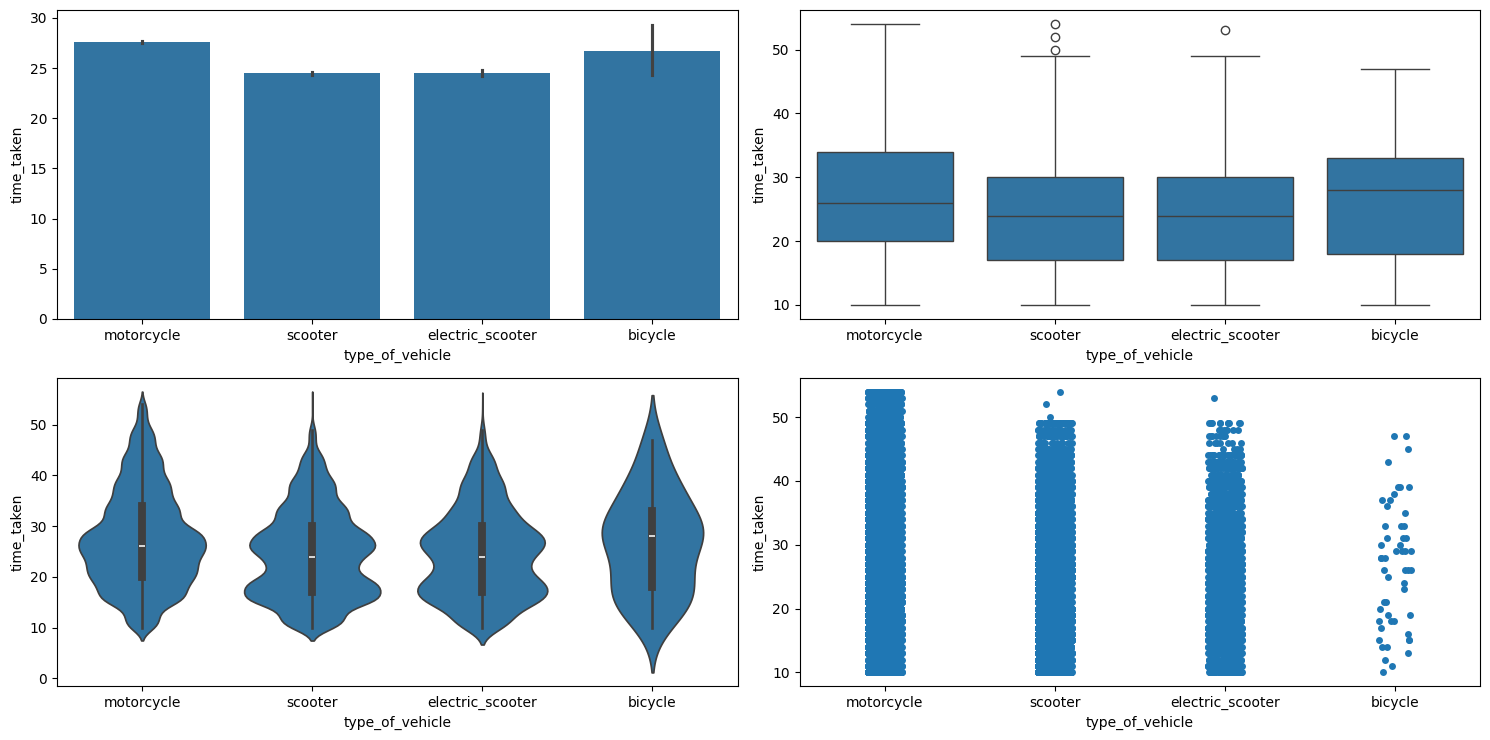

In [170]:
# does the type of vehicle affects delivery time

numerical_categorical_analysis(df_final, "type_of_vehicle", "time_taken")

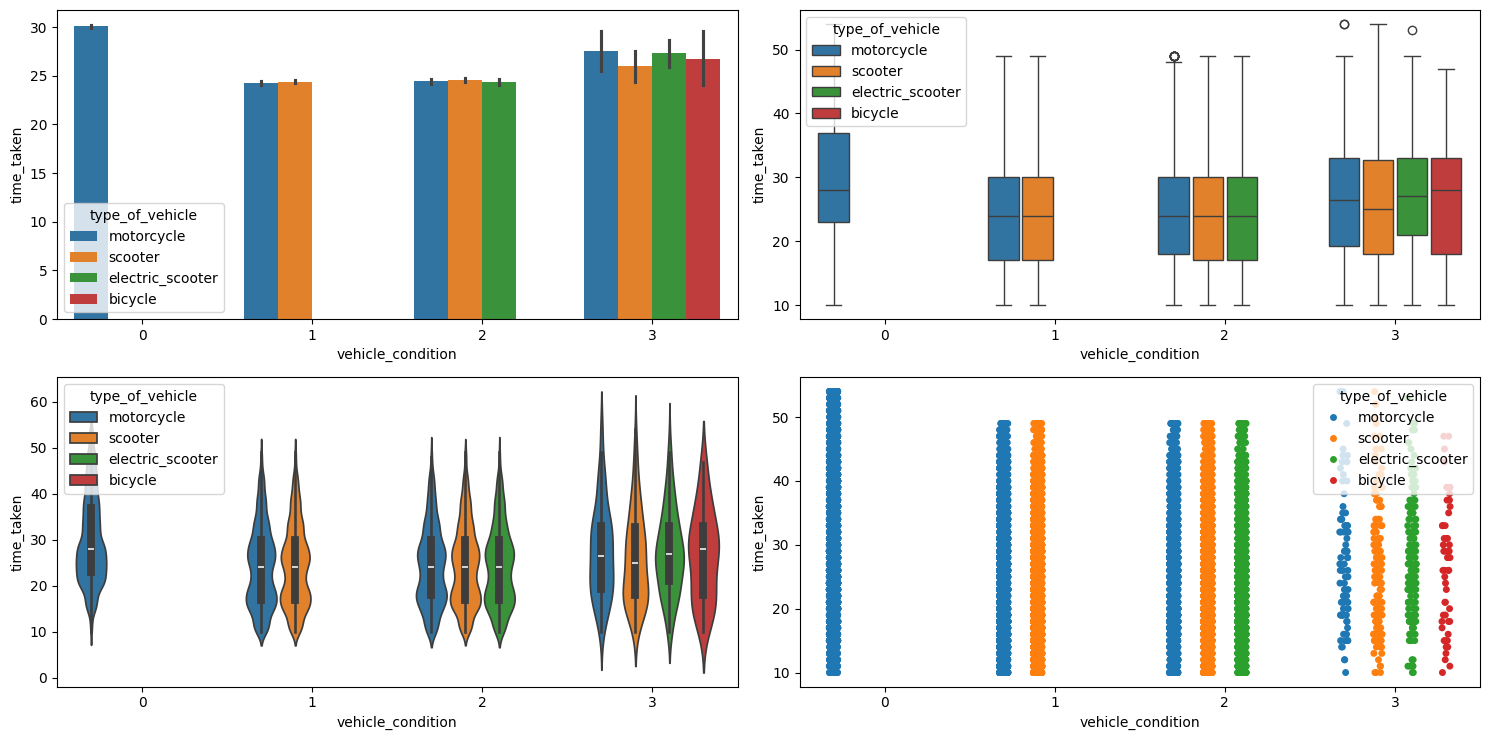

In [171]:
# vehicle condition and type

multivariate_analysis(df_final, "time_taken", "vehicle_condition", "type_of_vehicle")

In [172]:
# is their a relation between vehicle type and conditions

chi_2_test(df_final, "type_of_vehicle", "vehicle_condition")

0.0
Reject the null hypothesis. There is a significant association between type_of_vehicle and vehicle_condition.


## Type of Order

In [173]:
# type of order dtype

df_final['type_of_order'].dtype

dtype('O')

Count Percentage
type_of_order                  
snack          11512      25.3%
meal           11435     25.13%
drinks         11294     24.82%
buffet         11261     24.75%

**************************************************
The unique categories in type_of_order column are ['snack', 'drinks', 'buffet', 'meal']
**************************************************
The number of categories in type_of_order column are 4


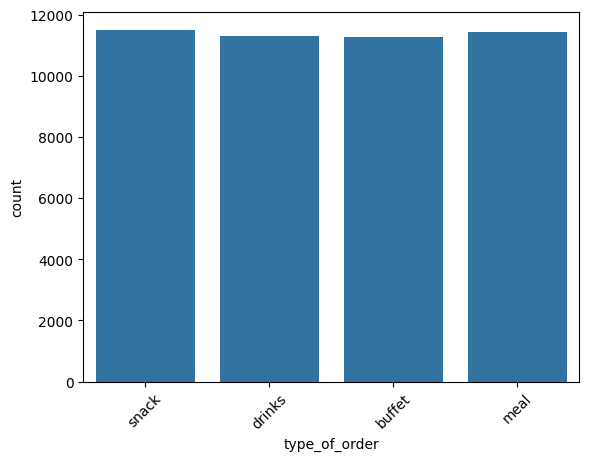

In [174]:
# analysis on type of order

categorical_analysis(df_final, "type_of_order")

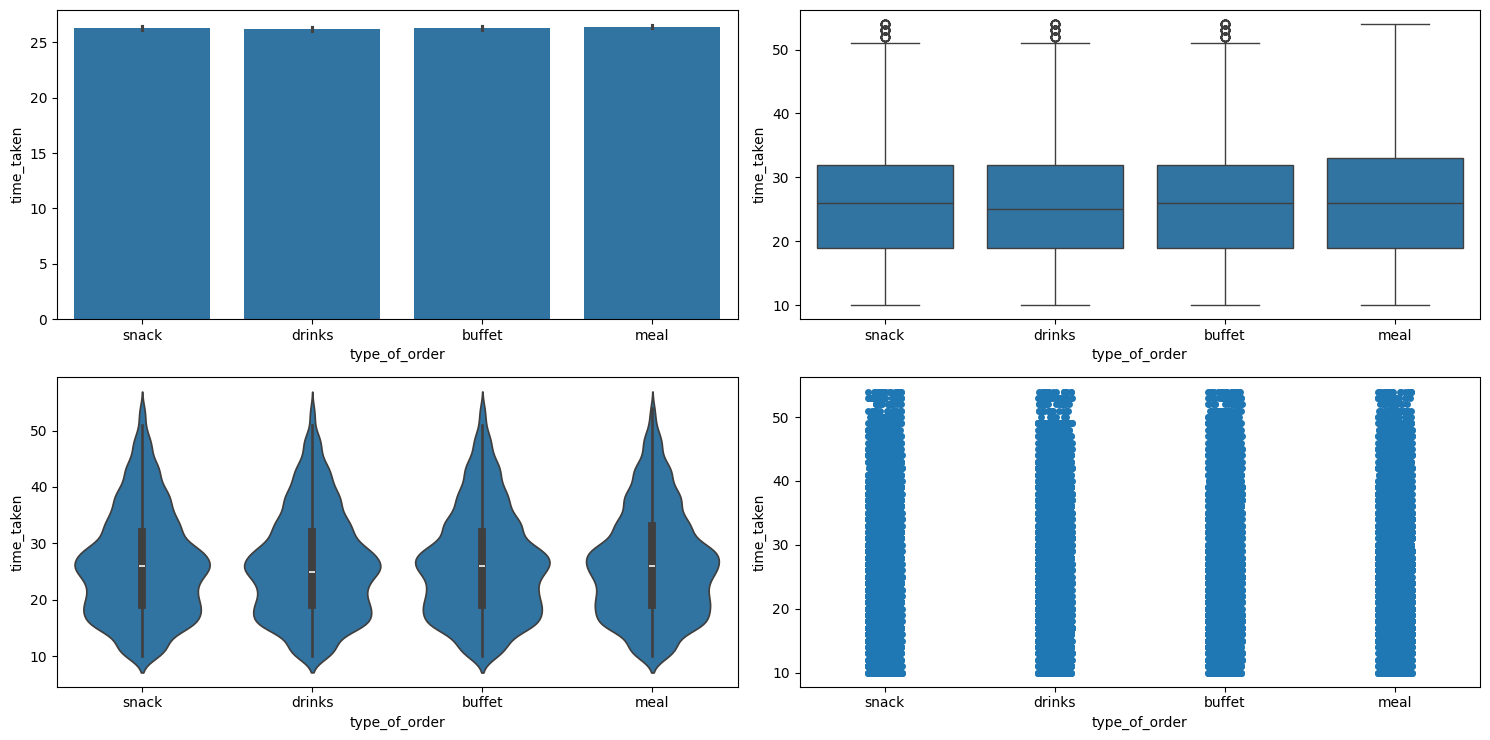

In [175]:
# does order type have have effect on delivery times

numerical_categorical_analysis(df_final, "type_of_order", "time_taken")

In [176]:
# hypothesis test

anova_test(df_final, "time_taken", "type_of_order")

0.3043309877239704
Fail to reject the null hypothesis. There is no significant relationship between time_taken and type_of_order.


In [177]:
# contingency table

pd.crosstab(df_final["type_of_order"],df_final["is_weekend"])

is_weekend        0     1
type_of_order            
buffet         8238  3023
drinks         8130  3164
meal           8290  3145
snack          8337  3175

In [178]:
# does type of order have an effect over pickup time

chi_2_test(df_final,"pickup_time_minutes","type_of_order")

0.49118080317709845
Fail to reject the null hypothesis. There is no significant association between pickup_time_minutes and type_of_order.


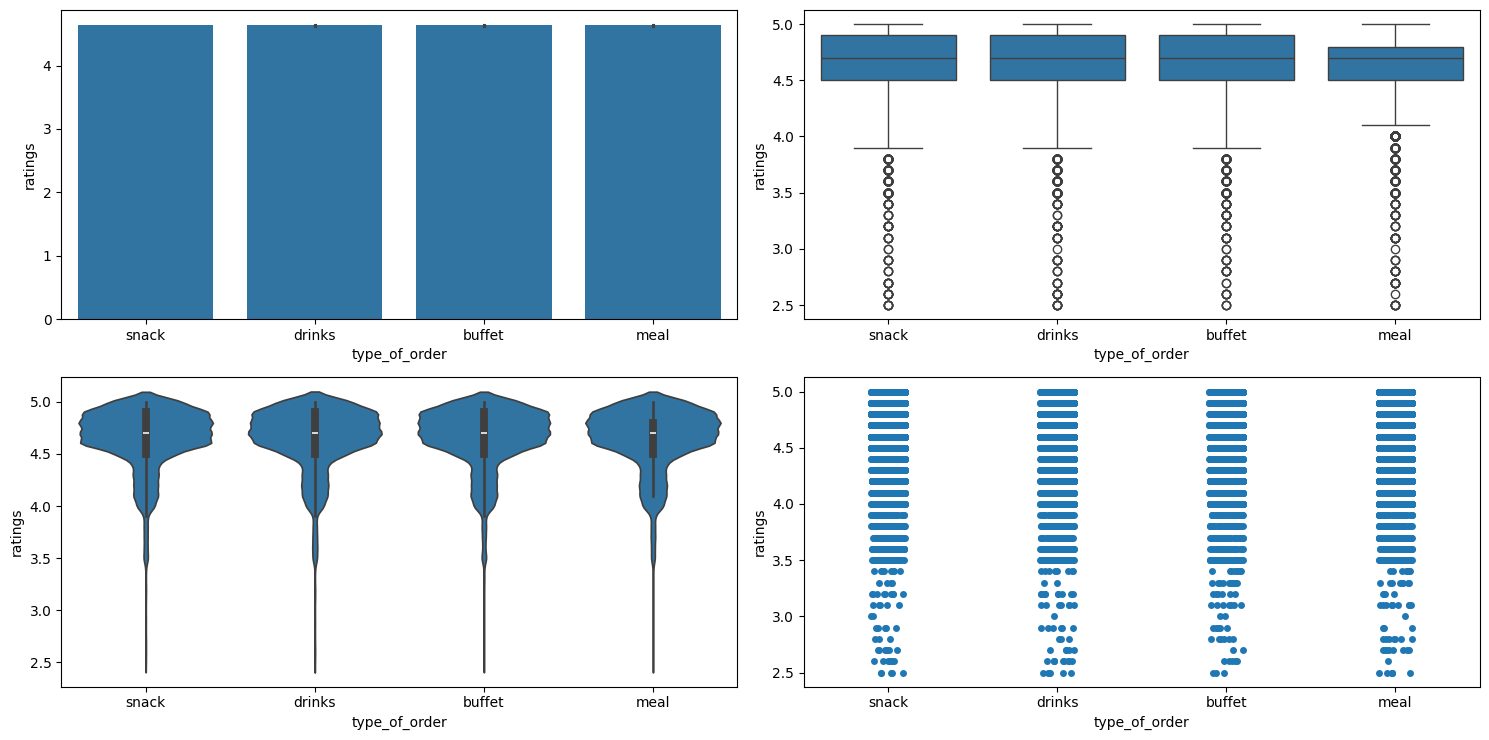

In [179]:
# does order type has an effect on ratings

numerical_categorical_analysis(df_final, "type_of_order", "ratings")

In [180]:
# is their a relationship between weekends and type of order

chi_2_test(df_final, "is_weekend", "type_of_order")

0.2658161540207276
Fail to reject the null hypothesis. There is no significant association between is_weekend and type_of_order.


In [181]:
# is their a relationship between festivals and type of order

chi_2_test(df_final, "festival", "type_of_order")

0.6149018072722126
Fail to reject the null hypothesis. There is no significant association between festival and type_of_order.


## City Name

Count Percentage
city_name                  
JAP         3439      7.56%
RANCHI      3222      7.08%
BANG        3184       7.0%
SUR         3182      6.99%
HYD         3177      6.98%
MUM         3168      6.96%
MYS         3164      6.95%
COIMB       3162      6.95%
VAD         3159      6.94%
INDO        3154      6.93%
CHEN        3132      6.88%
PUNE        3129      6.88%
AGR          761      1.67%
LUDH         758      1.67%
ALH          738      1.62%
KNP          737      1.62%
DEH          735      1.62%
GOA          709      1.56%
AURG         703      1.54%
KOC          701      1.54%
KOL          699      1.54%
BHP          689      1.51%

**************************************************
The unique categories in city_name column are ['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA', 'AURG', 'AGR', 'VAD', 'ALH', 'BHP']
**************************************************
The number of categories in city_name column are 22


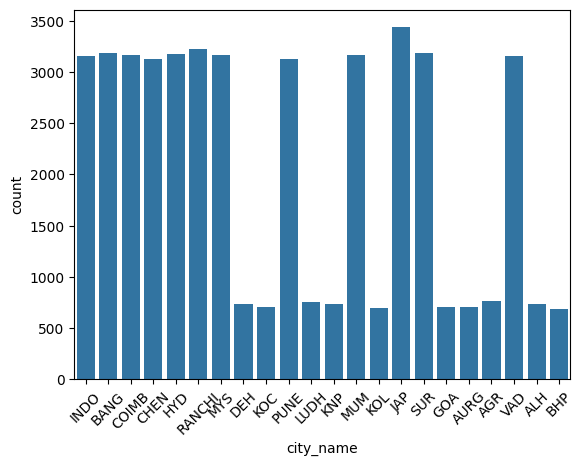

In [182]:
# categorical analysis on city name

categorical_analysis(df_final, "city_name")

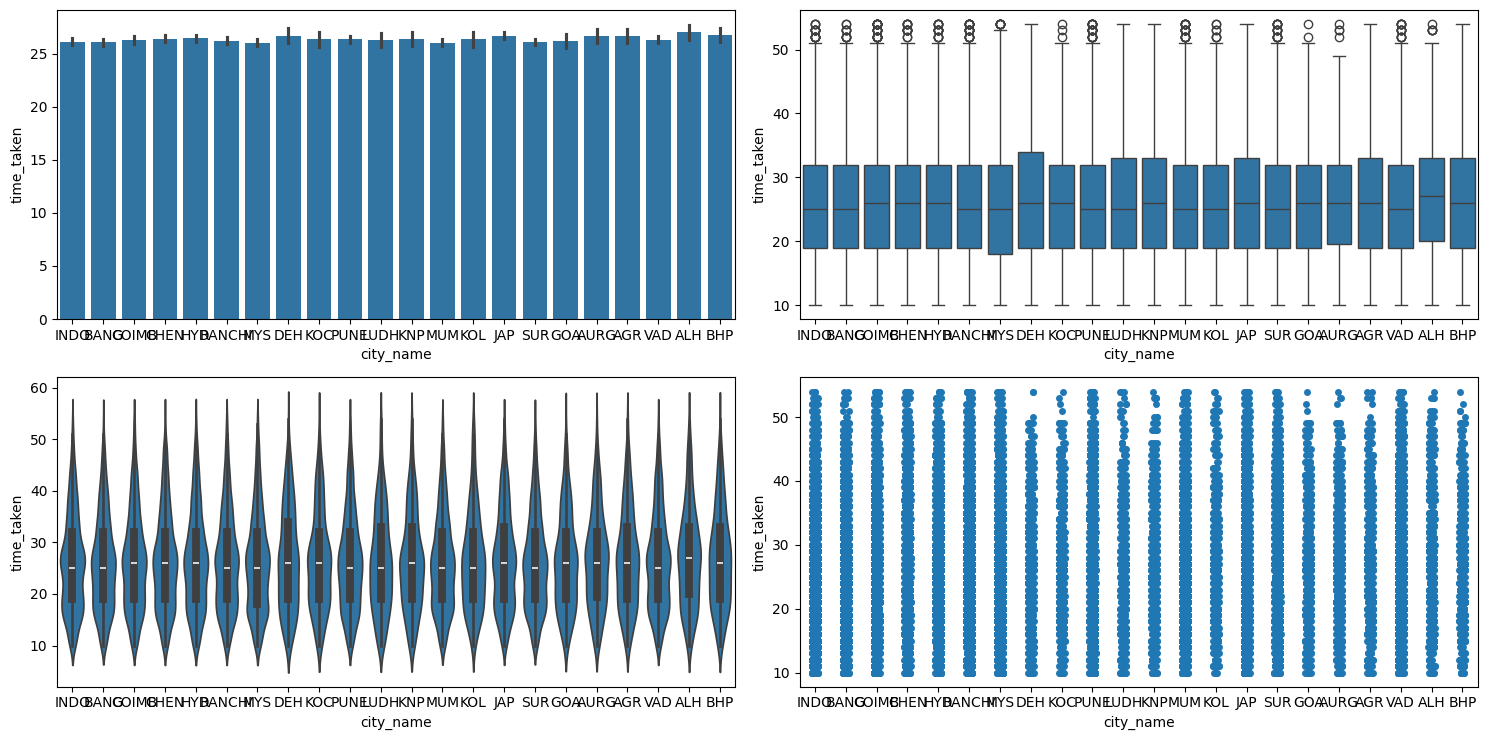

In [183]:
# does a city affects delivery times

numerical_categorical_analysis(df_final, "city_name", "time_taken")

Count Percentage
city_type                      
metropolitian  34029     76.81%
urban          10111     22.82%
semi-urban       164      0.37%

**************************************************
The unique categories in city_type column are ['urban', 'metropolitian', 'semi-urban', nan]
**************************************************
The number of categories in city_type column are 3


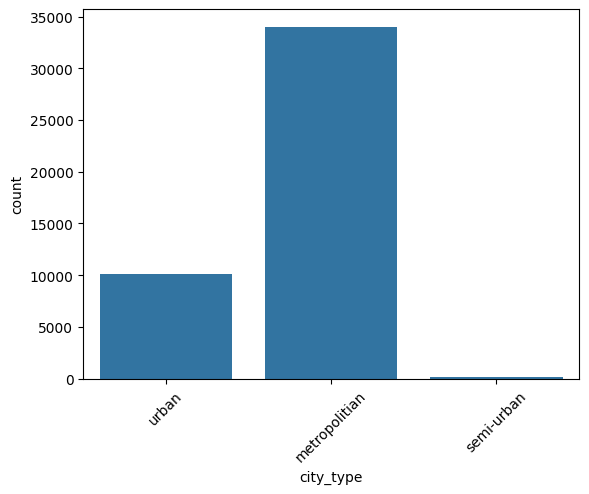

In [184]:
# categorical analysis on city type

categorical_analysis(df_final, "city_type")

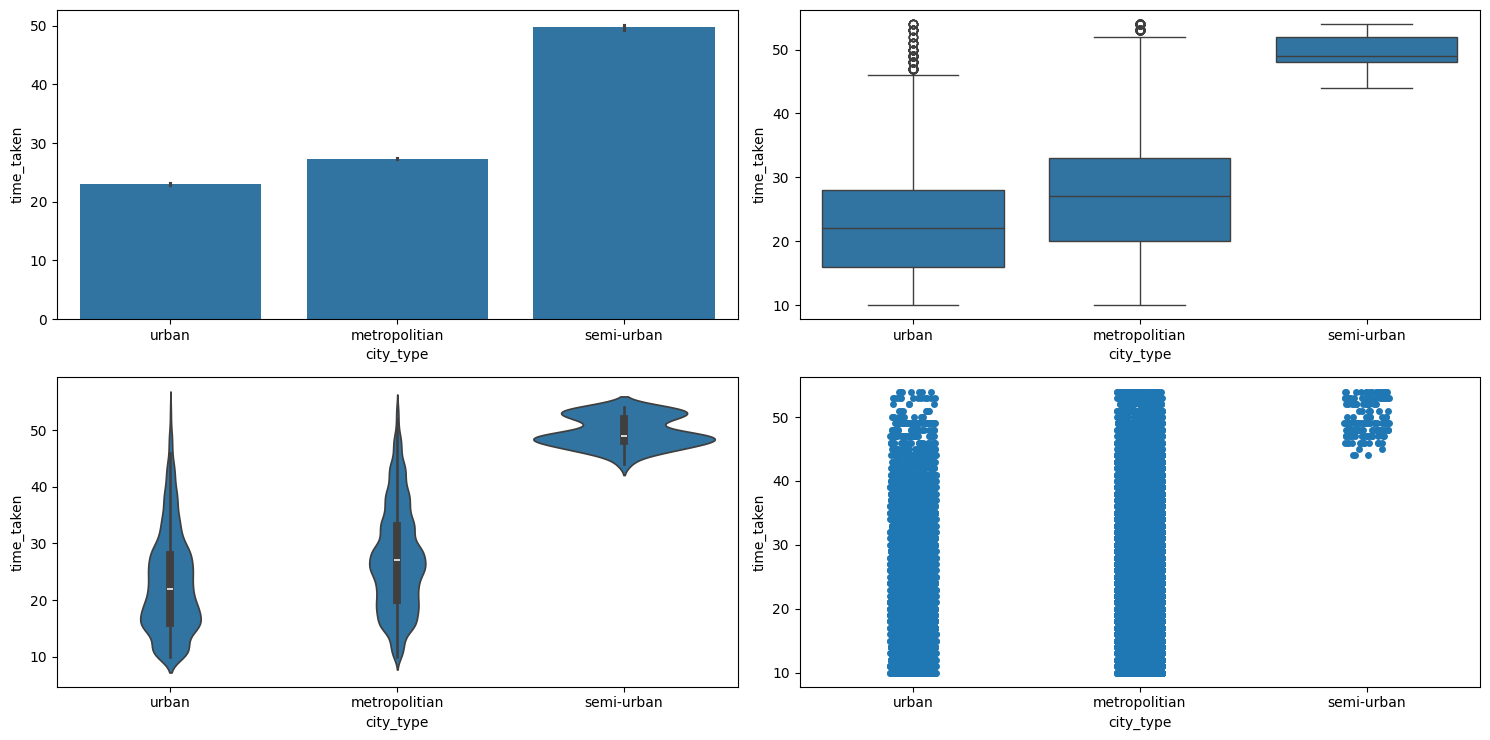

In [185]:
# does city types affect delivery times

numerical_categorical_analysis(df_final, "city_type", "time_taken")

In [186]:
# hypothesis test

anova_test(df_final, "time_taken", "city_type")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and city_type.


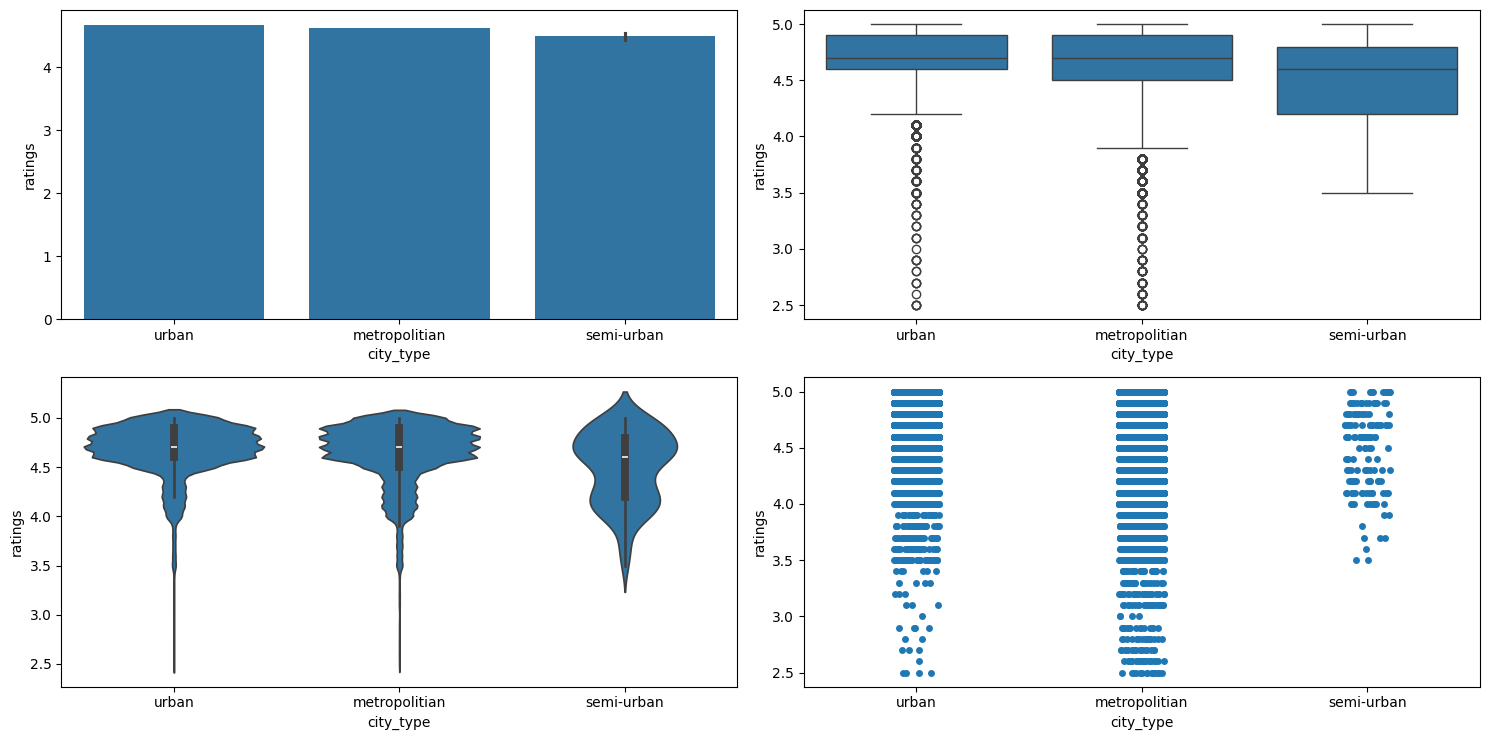

In [187]:
# does city type affects rider ratings

numerical_categorical_analysis(df_final, "city_type", "ratings")

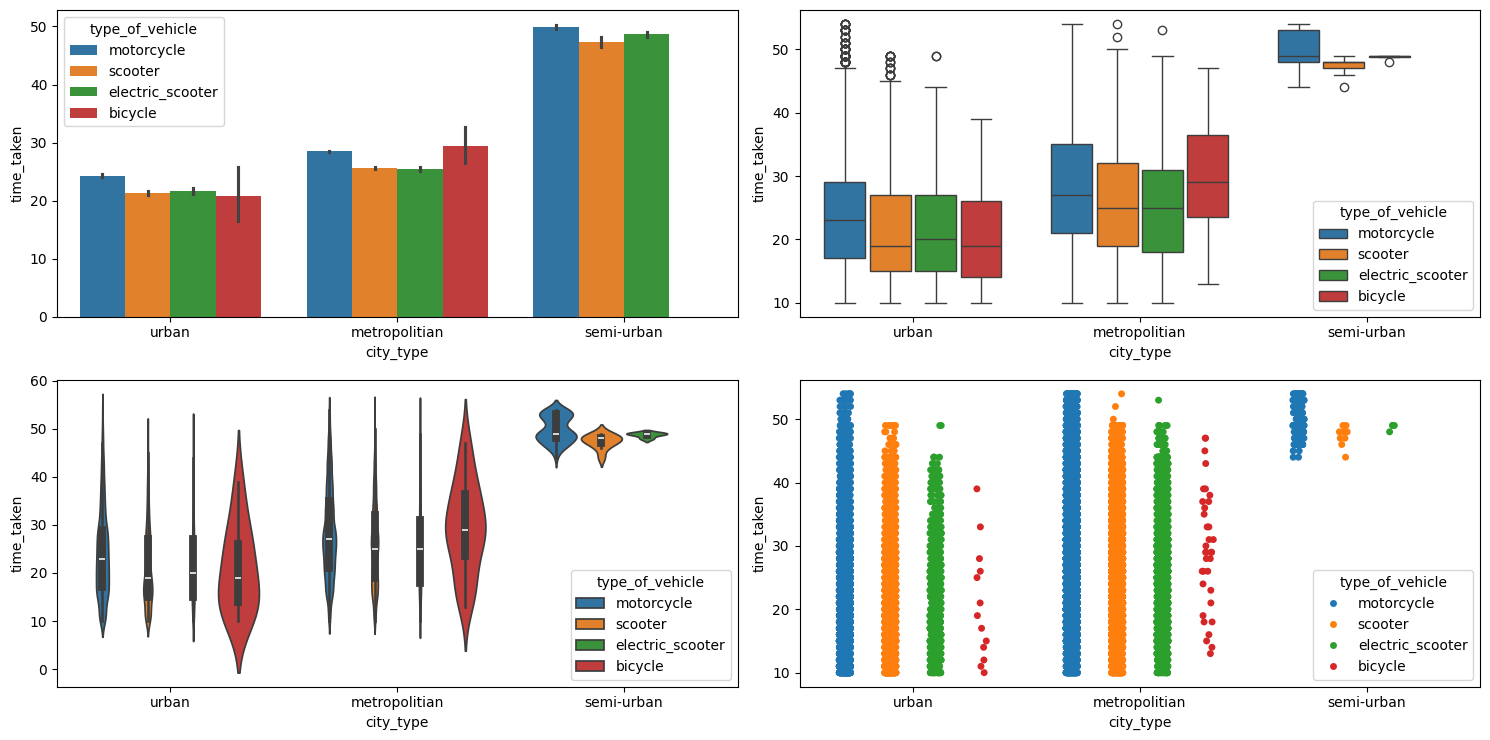

In [188]:
# city type, type of vehicle and delivery time analysis

multivariate_analysis(df_final, "time_taken", "city_type", "type_of_vehicle")

## Distance

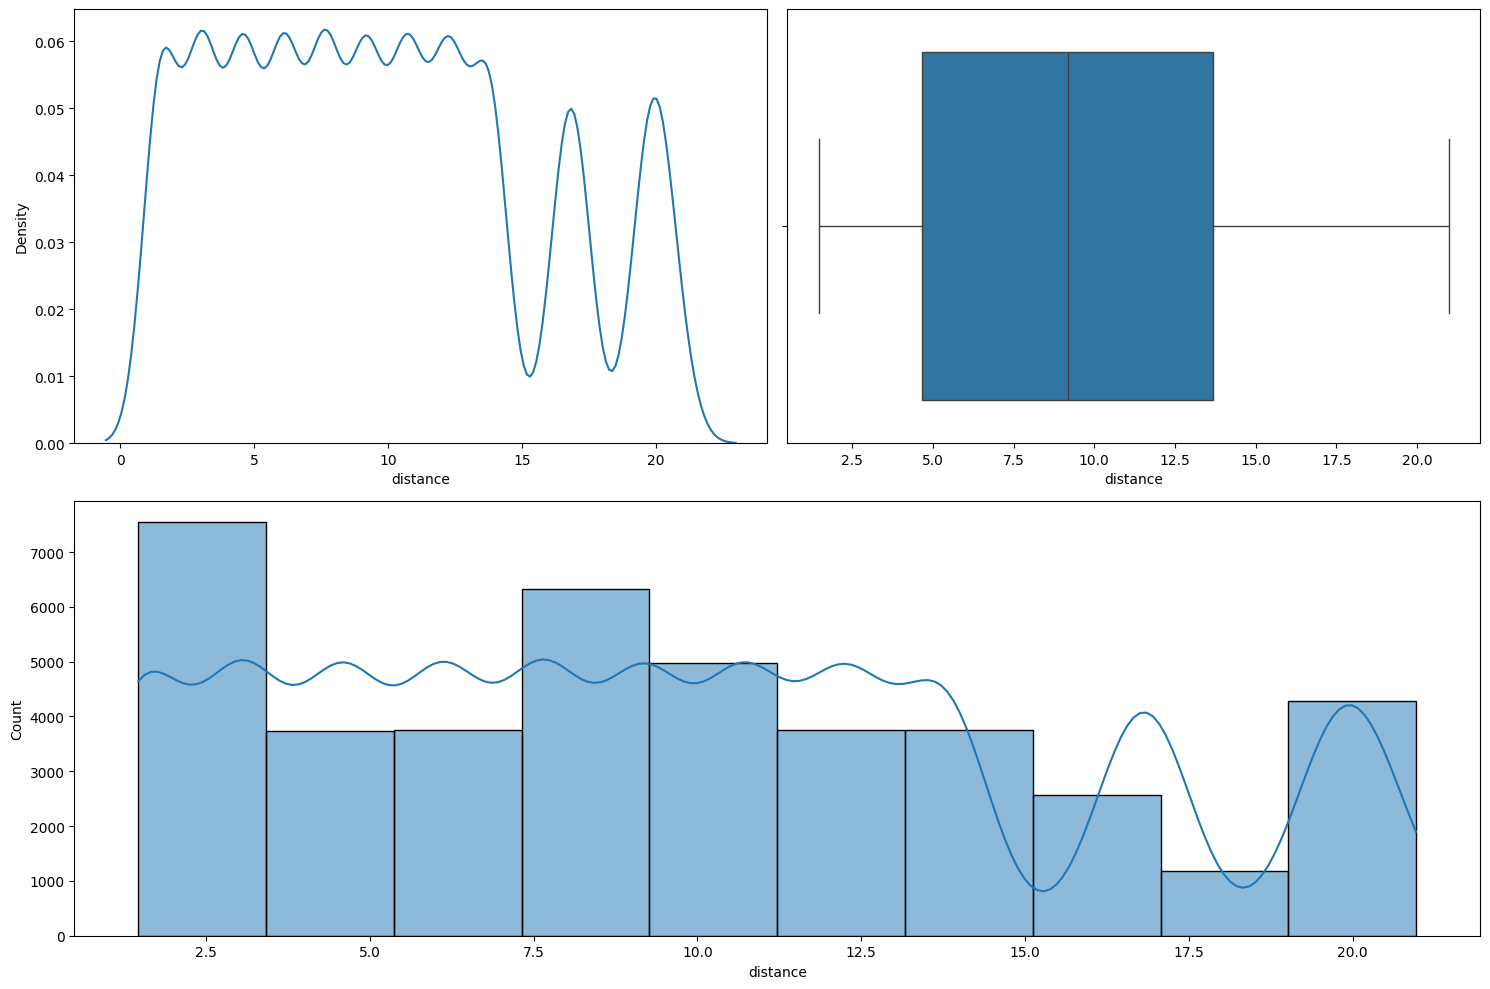

In [189]:
# numerical analysis of distance

numerical_analysis(df_final, "distance",bins=10)

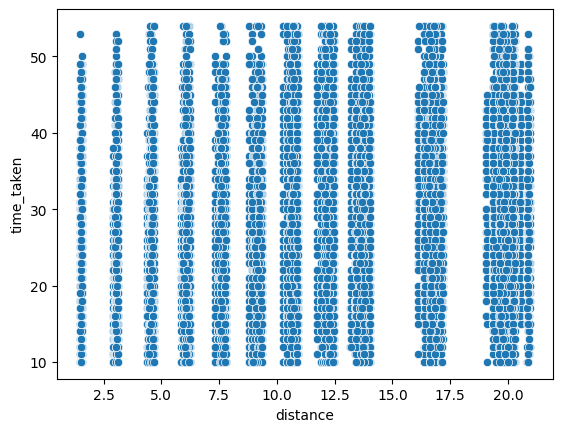

In [190]:
# relationship between distance and delivery times

sns.scatterplot(df_final,x="distance",y="time_taken")
plt.show()

In [191]:
# corr

df_final[["distance","time_taken"]].corr()

distance  time_taken
distance    1.000000    0.320705
time_taken  0.320705    1.000000

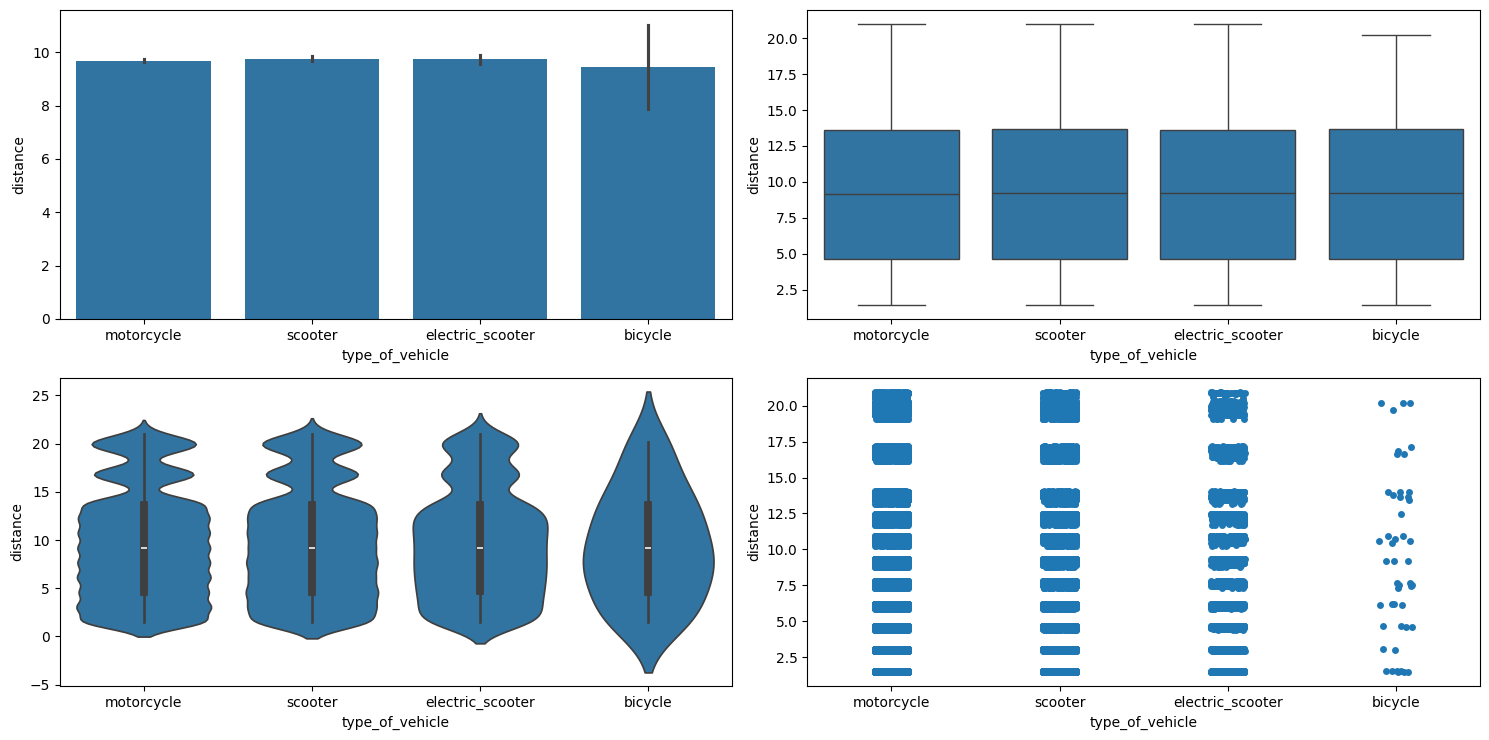

In [192]:
# vehicle type and distance analysis

numerical_categorical_analysis(df_final, "type_of_vehicle", "distance")

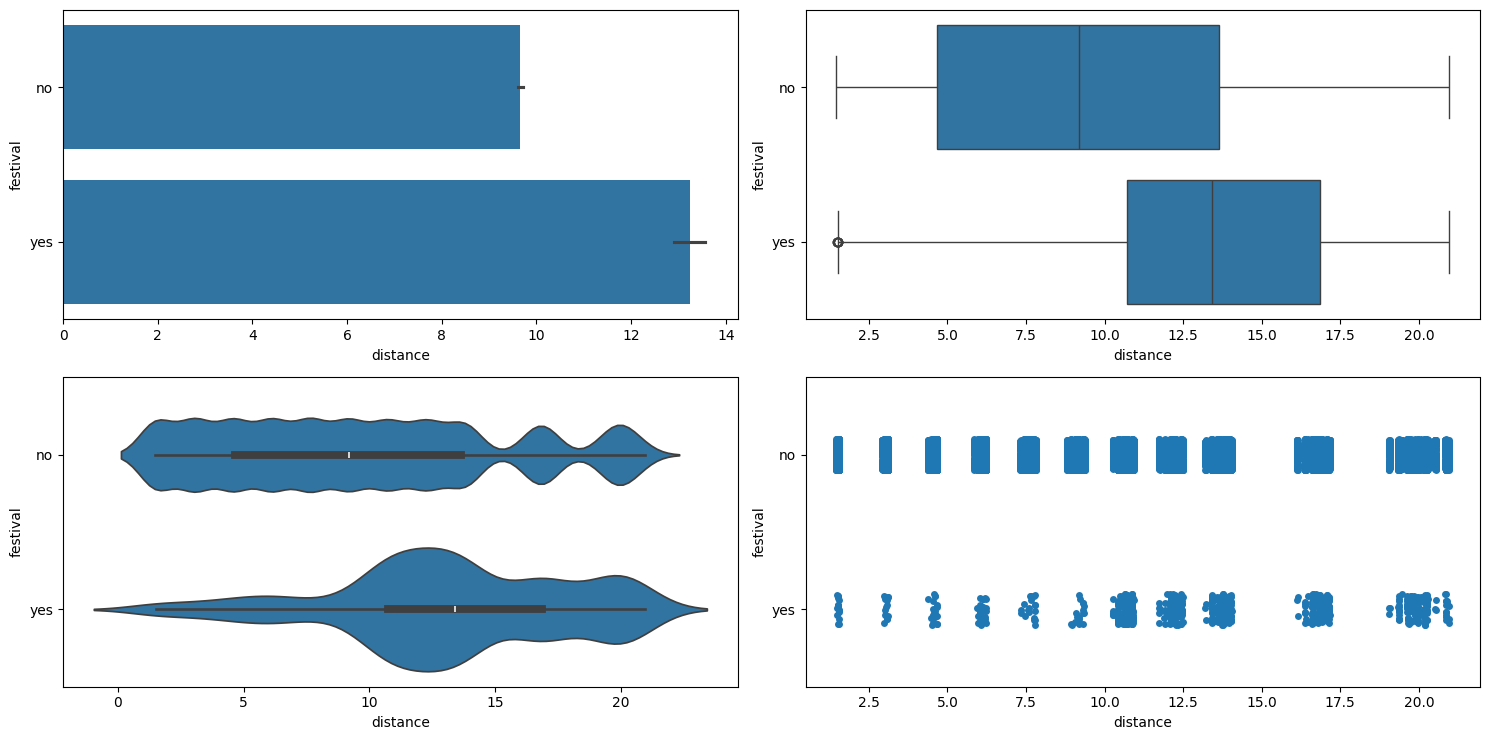

In [193]:
# do riders cover more distances during festivals

numerical_categorical_analysis(df_final, "distance", "festival")

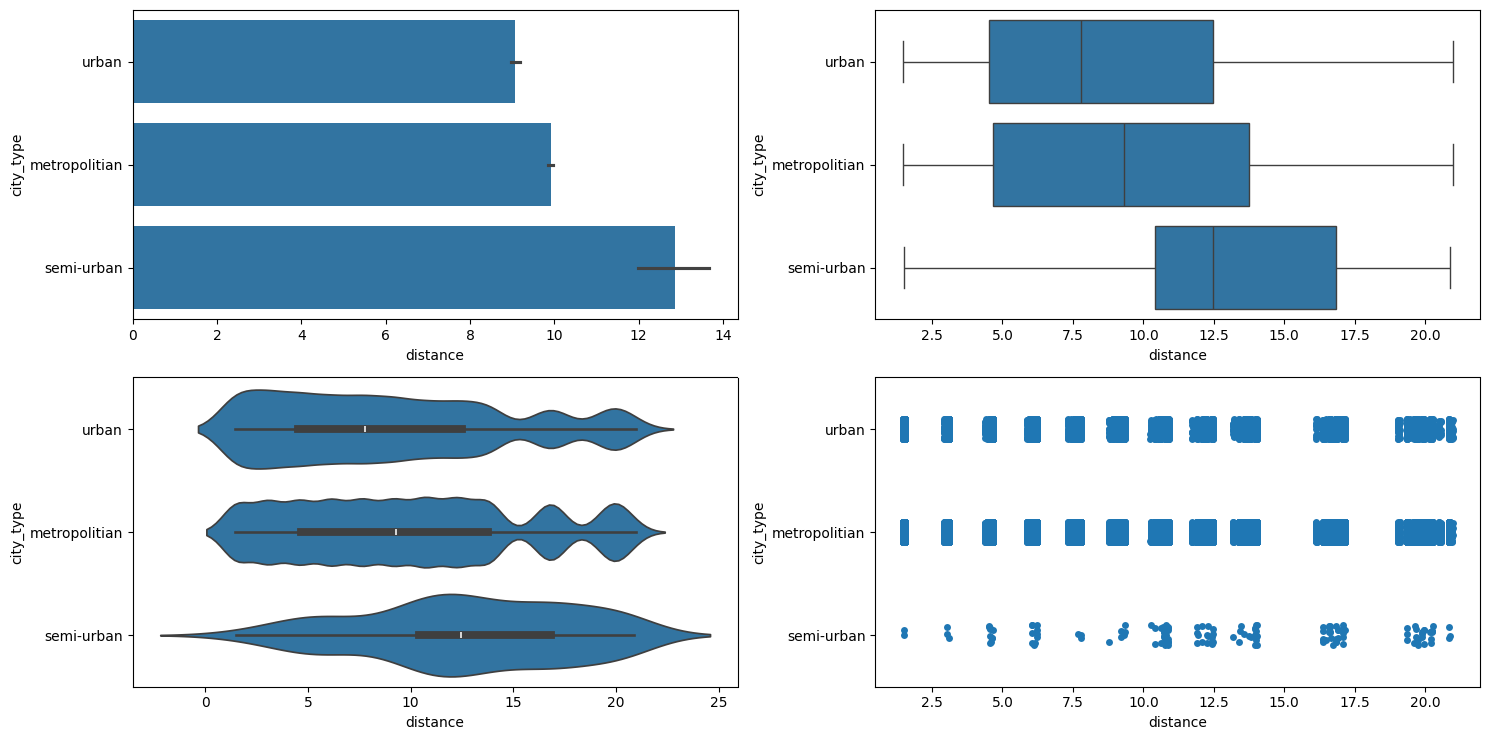

In [194]:
# distance and city type

numerical_categorical_analysis(df_final, "distance", "city_type")

In [195]:
# new feature based on distance

df_final = df_final.assign(
                        distance_type = pd.cut(df_final["distance"],bins=[0,5,10,15,25],
                                               right=False,labels=["short","medium","long","very_long"])
                                    )

In [196]:
df_final

rider_id   age  ratings  restaurant_latitude  \
0        INDORES13DEL02   37.0      4.9            22.745049   
1        BANGRES18DEL02   34.0      4.5            12.913041   
2        BANGRES19DEL01   23.0      4.4            12.914264   
3       COIMBRES13DEL02   38.0      4.7            11.003669   
4        CHENRES12DEL01   32.0      4.6            12.972793   
...                  ...   ...      ...                  ...   
45497     JAPRES04DEL01   30.0      4.8            26.902328   
45498     AGRRES16DEL01   21.0      4.6                  NaN   
45499    CHENRES08DEL03   30.0      4.9            13.022394   
45500   COIMBRES11DEL01   20.0      4.7            11.001753   
45501  RANCHIRES09DEL02   23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 75.892471          22.765049           75.912471   
1                 77.683237          13.043041           77.813237   
2                 77.678400          12.924264           77.688400   
3                 76.976494          11.053669           77.026494   
4                 80.249982          13.012793           80.289982   
...                     ...                ...                 ...   
45497             75.794257          26.912328           75.804257   
45498                   NaN                NaN                 NaN   
45499             80.242439          13.052394           80.272439   
45500             76.986241          11.041753           77.026241   
45501             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  order_day order_month  \
0      2022-03-19       sunny    high  ...         19           3   
1      2022-03-25      stormy     jam  ...         25           3   
2      2022-03-19  sandstorms     low  ...         19           3   
3      2022-04-05       sunny  medium  ...          5           4   
4      2022-03-26      cloudy    high  ...         26           3   
...           ...         ...     ...  ...        ...         ...   
45497  2022-03-24       windy    high  ...         24           3   
45498  2022-02-16       windy     jam  ...         16           2   
45499  2022-03-11      cloudy     low  ...         11           3   
45500  2022-03-07      cloudy    high  ...          7           3   
45501  2022-03-02         fog  medium  ...          2           3   

      order_day_of_week  is_weekend pickup_time_minutes order_time_hour  \
0              saturday           1                15.0            11.0   
1                friday           0                 5.0            19.0   
2              saturday           1                15.0             8.0   
3               tuesday           0                10.0            18.0   
4              saturday           1                15.0            13.0   
...                 ...         ...                 ...             ...   
45497          thursday           0                10.0            11.0   
45498         wednesday           0                15.0            19.0   
45499            friday           0                15.0            23.0   
45500            monday           0                 5.0            13.0   
45501         wednesday           0                 5.0            17.0   

       order_time_of_day   distance  distance_type  time_taken_pt  
0                morning   3.025149          short      -0.130153  
1                evening  20.183530      very_long       0.775092  
2                morning   1.552758          short       0.088493  
3                evening   7.790401         medium      -0.482135  
4              afternoon   6.210138         medium       0.494134  
...                  ...        ...            ...            ...  
45497            morning   1.489846          short       0.683422  
45498            evening        NaN            NaN       1.039335  
45499              night   4.657195          short      -1.15149

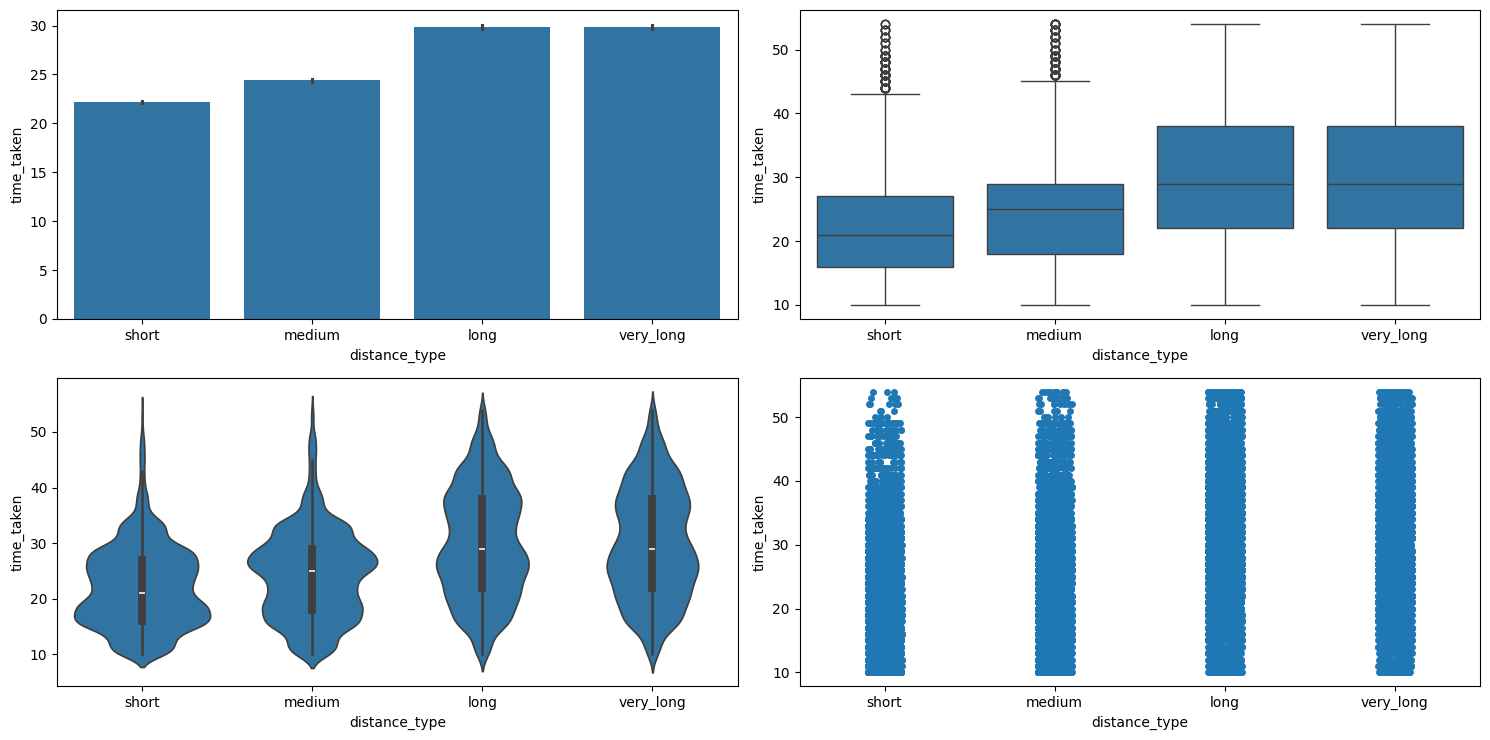

In [197]:
# does distance type affects delivery times

numerical_categorical_analysis(df_final, "distance_type", "time_taken")

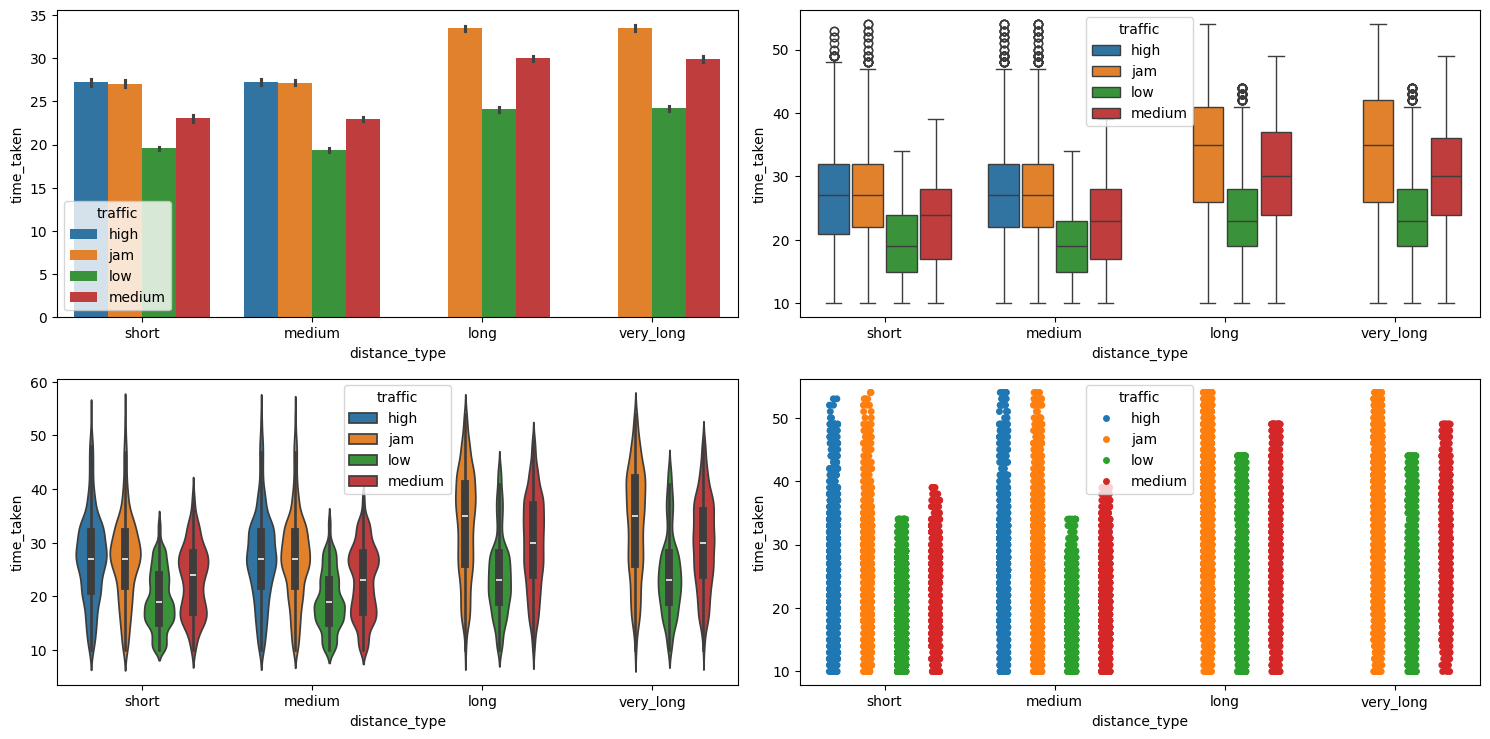

In [198]:
# delivery times based on distance and traffic

multivariate_analysis(df_final, "time_taken", "distance_type", "traffic")